<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/58/Uber_logo_2018.svg/1024px-Uber_logo_2018.svg.png" alt="UBER LOGO" width="50%" />

# UBER Pickups

## Company's Description 📇

<a href="http://uber.com/" target="_blank">Uber</a> is one of the most famous startup in the world. It started as a ride-sharing application for people who couldn't afford a taxi. Now, Uber expanded its activities to Food Delivery with <a href="https://www.ubereats.com/fr-en" target="_blank">Uber Eats</a>, package delivery, freight transportation and even urban transportation with <a href="https://www.uber.com/fr/en/ride/uber-bike/" target="_blank"> Jump Bike</a> and <a href="https://www.li.me/" target="_blank"> Lime </a> that the company funded. 


The company's goal is to revolutionize transportation accross the globe. It operates now on about 70 countries and 900 cities and generates over $14 billion revenue! 😮


## Project 🚧

One of the main pain point that Uber's team found is that sometimes drivers are not around when users need them. For example, a user might be in San Francisco's Financial District whereas Uber drivers are looking for customers in Castro.  

(If you are not familiar with the bay area, check out <a href="https://www.google.com/maps/place/San+Francisco,+CA,+USA/@37.7515389,-122.4567213,13.43z/data=!4m5!3m4!1s0x80859a6d00690021:0x4a501367f076adff!8m2!3d37.7749295!4d-122.4194155" target="_blank">Google Maps</a>)

Eventhough both neighborhood are not that far away, users would still have to wait 10 to 15 minutes before being picked-up, which is too long. Uber's research shows that users accept to wait 5-7 minutes, otherwise they would cancel their ride. 

Therefore, Uber's data team would like to work on a project where **their app would recommend hot-zones in major cities to be in at any given time of day.**  

## Goals 🎯

Uber already has data about pickups in major cities. Your objective is to create algorithms that will determine where are the hot-zones that drivers should be in. Therefore you will:

* Create an algorithm to find hot zones 
* Visualize results on a nice dashboard 

## Scope of this project 🖼️

To start off, Uber wants to try this feature in New York city. Therefore you will only focus on this city. Data can be found here: 

👉👉<a href="https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Machine+Learning+non+Supervis%C3%A9/Projects/uber-trip-data.zip" target="_blank"> Uber Trip Data</a> 👈👈

**You only need to focus on New York City for this project**

## Helpers 🦮

To help you achieve this project, here are a few tips that should help you: 

### Clustering is your friend 

Clustering technics are a perfect fit for the job. Think about it, all the pickup locations can be gathered into different clusters. You can then use **cluster coordinates to pin hot zones** 😉
    

### Create maps with `plotly` 

Check out <a href="https://plotly.com/" target="_blank">Plotly</a> documentation, you can create maps and populate them easily. Obviously, there are other libraries but this one should do the job pretty well. 


### Start small grow big 

Eventhough Uber wants to have hot-zones per hour and per day of week, you should first **start small**. Pick one day at a given hour and **then start to generalize** your approach. 

## Deliverable 📬

To complete this project, your team should: 

* Have a map with hot-zones using any python library (`plotly` or anything else). 
* You should **at least** describe hot-zones per day of week. 
* Compare results with **at least** two unsupervised algorithms like KMeans and DBScan. 

Your maps should look something like this: 

<img src="https://full-stack-assets.s3.eu-west-3.amazonaws.com/images/Clusters_uber_pickups.png" alt="Uber Cluster Map" />

### Working on the project with DBSCAN clustering algorithm

##### Installing Plotly

In [1]:
!pip install plotly

##### Importing adequate librairies

In [2]:
import pandas as pd 
import numpy as np 

from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

import plotly.express as px
import plotly.io as pio
pio.renderers.default = "iframe_connected"

##### Loading the dataset

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/uber-tlc-foil-response/master/uber-trip-data/uber-raw-data-apr14.csv")

##### Understanding the overall structure of the dataset

In [4]:
df.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [5]:
print ("The dataset contains {} observations".format(df.shape[0]))

The dataset contains 564516 observations


In [6]:
print ("The dataset contains {} columns".format(df.shape[1]))

The dataset contains 4 columns


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  564516 non-null  object 
 1   Lat        564516 non-null  float64
 2   Lon        564516 non-null  float64
 3   Base       564516 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.2+ MB


##### Take a sample of 100 000 observations from the dataset

In [8]:
dataset = df.sample(100000)
dataset.head()

,Date/Time,Lat,Lon,Base
112412,4/15/2014 21:56:00,40.7385,-73.9882,B02598
59958,4/5/2014 19:40:00,40.7145,-73.9845,B02598
72159,4/8/2014 8:36:00,40.6772,-73.9823,B02598
440386,4/15/2014 21:31:00,40.6801,-73.9969,B02682
146187,4/22/2014 8:44:00,40.7108,-74.0062,B02598


##### Converting "Date/Time" column to datetime format

In [9]:
dataset["Date/Time"] = pd.to_datetime(dataset["Date/Time"])

##### Verifying that the dataframe does not contain any missing values

In [10]:
dataset.isnull().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 112412 to 437546
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date/Time  100000 non-null  datetime64[ns]
 1   Lat        100000 non-null  float64       
 2   Lon        100000 non-null  float64       
 3   Base       100000 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 3.8+ MB


In [12]:
sample_data = dataset

##### Basic feature engineering from after conversion of "Date/Time" column to datetime format

In [13]:
sample_data["Year"] = sample_data["Date/Time"].dt.year
sample_data["Month"] = sample_data["Date/Time"].dt.month
sample_data["Day"] = sample_data["Date/Time"].dt.day
sample_data["Hour"] = sample_data["Date/Time"].dt.hour
sample_data["Minutes"] = sample_data["Date/Time"].dt.minute
sample_data["DayOfWeek"] = sample_data["Date/Time"].dt.day_name()

In [14]:
sample_data.head(3)

,Date/Time,Lat,Lon,Base,Year,Month,Day,Hour,Minutes,DayOfWeek
112412,2014-04-15 21:56:00,40.7385,-73.9882,B02598,2014,4,15,21,56,Tuesday
59958,2014-04-05 19:40:00,40.7145,-73.9845,B02598,2014,4,5,19,40,Saturday
72159,2014-04-08 08:36:00,40.6772,-73.9823,B02598,2014,4,8,8,36,Tuesday


##### Dropping "Date/Time" and "Base" column before further processing

In [15]:
sample_data = sample_data.drop(columns=["Date/Time", "Base"])

In [16]:
sample_data.head()

,Lat,Lon,Year,Month,Day,Hour,Minutes,DayOfWeek
112412,40.7385,-73.9882,2014,4,15,21,56,Tuesday
59958,40.7145,-73.9845,2014,4,5,19,40,Saturday
72159,40.6772,-73.9823,2014,4,8,8,36,Tuesday
440386,40.6801,-73.9969,2014,4,15,21,31,Tuesday
146187,40.7108,-74.0062,2014,4,22,8,44,Tuesday


In [17]:
sample_data.shape

(100000, 8)

##### Verifying that "DayOfWeek" column contains all the 7 days of the week

In [18]:
sample_data["DayOfWeek"].unique()

array(['Tuesday', 'Saturday', 'Friday', 'Monday', 'Wednesday', 'Sunday',
       'Thursday'], dtype=object)

##### Verifying that "Day" column contains all the 30 days of April

In [19]:
sample_data["Day"].unique()

array([15,  5,  8, 22, 25,  7, 18,  4, 30,  2, 13, 14, 23, 10, 16, 12, 24,
        3,  9, 11, 26,  6, 19, 28, 17, 27, 29, 21, 20,  1])

In [20]:
len(sample_data["Day"].unique())

30

##### Verifying the values in the "Hour" column

In [21]:
sample_data["Hour"].unique()

array([21, 19,  8, 15,  9, 13, 20, 14, 23, 11, 16,  0, 18, 22, 12, 17,  2,
        3,  7,  6,  1, 10,  5,  4])

In [22]:
len(sample_data["Hour"].unique())

24

##### Creating dataframes for information concerning each of the seven days of the week for April

In [23]:
monday = sample_data[sample_data.DayOfWeek == "Monday"]

In [24]:
tuesday = sample_data[sample_data.DayOfWeek == "Tuesday"]

In [25]:
wednesday = sample_data[sample_data.DayOfWeek == "Wednesday"]

In [26]:
thursday = sample_data[sample_data.DayOfWeek == "Thursday"]

In [27]:
friday = sample_data[sample_data.DayOfWeek == "Friday"]

In [28]:
saturday = sample_data[sample_data.DayOfWeek == "Saturday"]

In [29]:
sunday = sample_data[sample_data.DayOfWeek == "Sunday"]

##### Verifying that the number of rows of each of the dataframes add up to the total number of rows of the original dataset

In [30]:
monday.shape[0]+tuesday.shape[0]+wednesday.shape[0]+thursday.shape[0]+friday.shape[0]+saturday.shape[0]+sunday.shape[0]

100000

##### Creating dataframes for information concerning each of the 24 hours of the day

In [31]:
midnight = sample_data[sample_data.Hour == 0]

In [32]:
one = sample_data[sample_data.Hour == 1]

In [33]:
two = sample_data[sample_data.Hour == 2]

In [34]:
three = sample_data[sample_data.Hour == 3]

In [35]:
four = sample_data[sample_data.Hour == 4]

In [36]:
five = sample_data[sample_data.Hour == 5]

In [37]:
six = sample_data[sample_data.Hour == 6]

In [38]:
seven = sample_data[sample_data.Hour == 7]

In [39]:
eight = sample_data[sample_data.Hour == 8]

In [40]:
nine = sample_data[sample_data.Hour == 9]

In [41]:
ten = sample_data[sample_data.Hour == 10]

In [42]:
eleven = sample_data[sample_data.Hour == 11]

In [43]:
twelve = sample_data[sample_data.Hour == 12]

In [44]:
thirteen = sample_data[sample_data.Hour == 13]

In [45]:
fourteen = sample_data[sample_data.Hour == 14]

In [46]:
fifteen = sample_data[sample_data.Hour == 15]

In [47]:
sixteen = sample_data[sample_data.Hour == 16]

In [48]:
seventeen = sample_data[sample_data.Hour == 17]

In [49]:
eighteen = sample_data[sample_data.Hour == 18]

In [50]:
nineteen = sample_data[sample_data.Hour == 19]

In [51]:
twenty = sample_data[sample_data.Hour == 20]

In [52]:
twenty_one = sample_data[sample_data.Hour == 21]

In [53]:
twenty_two = sample_data[sample_data.Hour == 22]

In [54]:
twenty_three = sample_data[sample_data.Hour == 23]

##### Verifying that the number of rows of each of the dataframes add up to the total number of rows of the original dataset

In [55]:
one.shape[0]+two.shape[0]+three.shape[0]+four.shape[0]+five.shape[0]+six.shape[0]+seven.shape[0]+eight.shape[0]+nine.shape[0]+ten.shape[0]+eleven.shape[0]+twelve.shape[0]+thirteen.shape[0]+fourteen.shape[0]+fifteen.shape[0]+sixteen.shape[0]+seventeen.shape[0]+eighteen.shape[0]+nineteen.shape[0]+twenty.shape[0]+twenty_one.shape[0]+twenty_two.shape[0]+twenty_three.shape[0]+midnight.shape[0]

100000

### Picking one day at a given hour, as asked in the exercise, for a test

In [56]:
sunday_noon = sunday[sunday.Hour == 12]
sunday_noon.head()

,Lat,Lon,Year,Month,Day,Hour,Minutes,DayOfWeek
372834,40.7365,-74.0018,2014,4,6,12,15,Sunday
424825,40.7038,-73.9866,2014,4,13,12,49,Sunday
471560,40.7695,-73.9564,2014,4,20,12,29,Sunday
138184,40.7295,-73.9899,2014,4,20,12,16,Sunday
524032,40.7232,-73.7905,2014,4,27,12,19,Sunday


In [57]:
sunday_noon.shape

(404, 8)

##### Dropping unnecessary columns of the dataset

In [58]:
sunday_noon = sunday_noon.drop(columns=["Year", "Month", "Day"])

In [59]:
sunday_noon.head()

,Lat,Lon,Hour,Minutes,DayOfWeek
372834,40.7365,-74.0018,12,15,Sunday
424825,40.7038,-73.9866,12,49,Sunday
471560,40.7695,-73.9564,12,29,Sunday
138184,40.7295,-73.9899,12,16,Sunday
524032,40.7232,-73.7905,12,19,Sunday


##### A scatterplot to show how the pick-up points are scattered in New York city on Sundays between noon and 12 h 59

In [60]:
fig_sunday_noon = px.scatter_mapbox(
        sunday_noon, 
        lat="Lat", 
        lon="Lon",
        mapbox_style="carto-positron"
)

fig_sunday_noon.show()

##### Scaling numerical data and one-hot encoding categorical data

In [61]:
numeric_features = [0, 1, 2, 3] # Positions of numerical variables
numeric_transformer = StandardScaler()

# Creation of the transformer for categorical values
categorical_features = [4] # Positions of categorical variables
categorical_transformer = OneHotEncoder(drop='first')

# Combining the transformers in ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

print("Preprocessing on dataset...")
print(sunday_noon.head())
scaled_X_sunday_noon = preprocessor.fit_transform(sunday_noon)
print('...Completed.')
print(scaled_X_sunday_noon[0:5, :])
print()

Preprocessing on dataset...
            Lat      Lon  Hour  Minutes DayOfWeek
372834  40.7365 -74.0018    12       15    Sunday
424825  40.7038 -73.9866    12       49    Sunday
471560  40.7695 -73.9564    12       29    Sunday
138184  40.7295 -73.9899    12       16    Sunday
524032  40.7232 -73.7905    12       19    Sunday
...Completed.
[[ 0.00888279 -0.62232407  0.         -0.88975319]
 [-0.79819302 -0.30117044  0.          1.2185183 ]
 [ 0.82336297  0.33691112  0.         -0.0216414 ]
 [-0.16388573 -0.37089458  0.         -0.8277452 ]
 [-0.3193774   3.84213397  0.         -0.64172125]]



#####  Use DBSCAN and a for loop to create a variety of models testing different epsilon values

In [62]:
from sklearn.cluster import DBSCAN

outlier_percent = []

for eps in np.linspace(0.001, 3, 100):
    
    # Create Model
    dbscan = DBSCAN(eps=eps,min_samples=2*scaled_X_sunday_noon.shape[1], metric="manhattan", algorithm="brute")
    dbscan.fit(scaled_X_sunday_noon)
   
     
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)

##### Creating a line plot of the percentage of outlier points versus the epsilon value choice

Text(0.5, 0, 'Epsilon value')

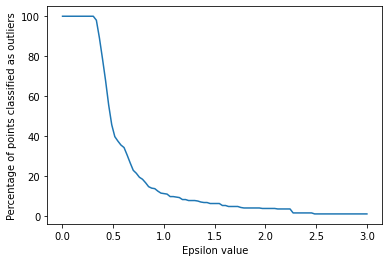

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x=np.linspace(0.001, 3, 100),y=outlier_percent)
plt.ylabel("Percentage of points classified as outliers")
plt.xlabel("Epsilon value")

##### Following the litterature on DBSCAN, min_samples should be two times the number of dimensions

In [64]:
min_samples = (2*sunday_noon.shape[1])
min_samples

10

##### Retraining a DBSCAN model with epsilon value = 0.6, based on the plot created above, and min_samples = 8

In [65]:
eps = 0.6
min_samples = 8
dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric="manhattan", algorithm="brute")
dbscan.fit(scaled_X_sunday_noon)

DBSCAN(algorithm='brute', eps=0.6, metric='manhattan', min_samples=8)

In [66]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0]), array([139, 265]))

In [67]:
sunday_noon["cluster"] = dbscan.labels_
sunday_noon.head()

,Lat,Lon,Hour,Minutes,DayOfWeek,cluster
372834,40.7365,-74.0018,12,15,Sunday,0
424825,40.7038,-73.9866,12,49,Sunday,-1
471560,40.7695,-73.9564,12,29,Sunday,0
138184,40.7295,-73.9899,12,16,Sunday,0
524032,40.7232,-73.7905,12,19,Sunday,-1


##### A scatterplot to see how the DBSCAN algorithm has clustered the pick-up points in New York city, except outliers on Sundays from noon to 12 h 59

In [68]:
fig_sunday_noon_cluster = px.scatter_mapbox(
        sunday_noon[sunday_noon.cluster != -1], 
        lat="Lat", 
        lon="Lon",
        color="cluster",
        mapbox_style="carto-positron"
)

fig_sunday_noon_cluster.show()

### Picking Sunday to observe how the clustering algorithm behaves

In [69]:
sunday.shape

(8989, 8)

In [70]:
fig_sunday = px.scatter_mapbox(
        sunday, 
        lat="Lat", 
        lon="Lon",
        mapbox_style="carto-positron"
)

fig_sunday.show()

##### Dropping unnecessary columns of the dataset

In [71]:
sunday = sunday.drop(columns=["Year", "Month", "Day"])

In [72]:
sunday.head()

,Lat,Lon,Hour,Minutes,DayOfWeek
15367,40.7630,-73.9715,11,56,Sunday
375728,40.7183,-74.0070,22,15,Sunday
189865,40.7199,-74.0003,18,22,Sunday
522402,40.7196,-73.9980,1,14,Sunday
372604,40.7076,-74.0030,11,20,Sunday


##### Scaling numerical data and one-hot encoding categorical data

In [73]:
numeric_features = [0, 1, 2, 3] # Positions of numerical variables
numeric_transformer = StandardScaler()

# Creation of the transformer for categorical values
categorical_features = [4] # Positions of categorical variables
categorical_transformer = OneHotEncoder(drop='first')

# Combining the transformers in ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

print("Preprocessing on dataset...")
print(sunday.head())
scaled_X_sunday = preprocessor.fit_transform(sunday)
print('...Completed.')
print(scaled_X_sunday[0:5, :])
print()

Preprocessing on dataset...
            Lat      Lon  Hour  Minutes DayOfWeek
15367   40.7630 -73.9715    11       56    Sunday
375728  40.7183 -74.0070    22       15    Sunday
189865  40.7199 -74.0003    18       22    Sunday
522402  40.7196 -73.9980     1       14    Sunday
372604  40.7076 -74.0030    11       20    Sunday
...Completed.
[[ 0.67794454 -0.01855794 -0.14193475  1.56507666]
 [-0.3480714  -0.56800173  1.43975876 -0.79483578]
 [-0.31134599 -0.46430389  0.86459748 -0.3919239 ]
 [-0.31823201 -0.42870612 -1.57983795 -0.85239462]
 [-0.59367253 -0.50609257 -0.14193475 -0.50704158]]



#####  Use DBSCAN and a for loop to create a variety of models testing different epsilon values

In [74]:
from sklearn.cluster import DBSCAN

outlier_percent = []

for eps in np.linspace(0.1, 2, 10):
    
    # Create Model
    dbscan = DBSCAN(eps=eps,min_samples=2*scaled_X_sunday.shape[1], metric="manhattan", algorithm="brute")
    dbscan.fit(scaled_X_sunday)
   
     
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)

##### Creating a line plot of the percentage of outlier points versus the epsilon value choice

Text(0.5, 0, 'Epsilon value')

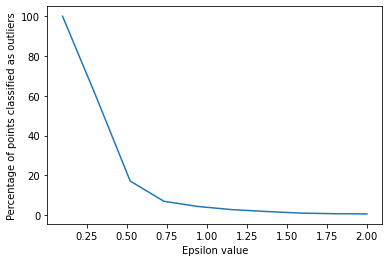

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x=np.linspace(0.1, 2, 10), y=outlier_percent)
plt.ylabel("Percentage of points classified as outliers")
plt.xlabel("Epsilon value")

##### Retraining a DBSCAN model with epsilon value = 0.75, based on the plot created above, and min_samples = 6

In [76]:
eps = 0.75
min_samples = 6

dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric="manhattan", algorithm="brute")
dbscan.fit(scaled_X_sunday)

DBSCAN(algorithm='brute', eps=0.75, metric='manhattan', min_samples=6)

In [77]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3,  4]), array([ 520, 8066,  312,   16,   69,    6]))

In [78]:
sunday["cluster"] = dbscan.labels_
sunday.head()

,Lat,Lon,Hour,Minutes,DayOfWeek,cluster
15367,40.7630,-73.9715,11,56,Sunday,0
375728,40.7183,-74.0070,22,15,Sunday,0
189865,40.7199,-74.0003,18,22,Sunday,0
522402,40.7196,-73.9980,1,14,Sunday,0
372604,40.7076,-74.0030,11,20,Sunday,0


##### A scatterplot to see how the DBSCAN algorithm has clustered the pick-up points, except outliers, in New York city on Sundays

In [79]:
fig_sunday_cluster = px.scatter_mapbox(
        sunday[sunday.cluster != -1], 
        lat="Lat", 
        lon="Lon",
        color="cluster",
        mapbox_style="carto-positron"
)

fig_sunday_cluster.show()

### Picking Monday to observe how the clustering algorithm behaves

In [80]:
monday.shape

(10755, 8)

In [81]:
fig_monday = px.scatter_mapbox(
        monday, 
        lat="Lat", 
        lon="Lon",
        mapbox_style="carto-positron"
)

fig_monday.show()

##### Dropping unnecessary columns of the dataset

In [82]:
monday = monday.drop(columns=["Year", "Month", "Day"])

In [83]:
monday.head()

,Lat,Lon,Hour,Minutes,DayOfWeek
66945,40.7224,-73.9887,9,29,Monday
268379,40.6843,-73.8211,19,37,Monday
383369,40.7648,-73.9761,20,35,Monday
430220,40.6736,-73.9774,14,43,Monday
195292,40.7286,-73.9941,18,23,Monday


##### Scaling numerical data and one-hot encoding categorical data

In [84]:
numeric_features = [0, 1, 2, 3] # Positions of numerical variables
numeric_transformer = StandardScaler()

# Creation of the transformer for categorical values
categorical_features = [4] # Positions of categorical variables
categorical_transformer = OneHotEncoder(drop='first')

# Combining the transformers in ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

print("Preprocessing on dataset...")
print(monday.head())
scaled_X_monday = preprocessor.fit_transform(monday)
print('...Completed.')
print(scaled_X_monday[0:5, :])
print()

Preprocessing on dataset...
            Lat      Lon  Hour  Minutes DayOfWeek
66945   40.7224 -73.9887     9       29    Monday
268379  40.6843 -73.8211    19       37    Monday
383369  40.7648 -73.9761    20       35    Monday
430220  40.6736 -73.9774    14       43    Monday
195292  40.7286 -73.9941    18       23    Monday
...Completed.
[[-0.46897436 -0.27068791 -0.89700539 -0.01688367]
 [-1.45353508  2.68993553  0.92754174  0.44737678]
 [ 0.62670476 -0.04811121  1.10999645  0.33131167]
 [-1.73003901 -0.07107547  0.01526818  0.79557212]
 [-0.30875713 -0.36607793  0.74508703 -0.36507901]]



#####  Use DBSCAN and a for loop to create a variety of models testing different epsilon values

In [85]:
from sklearn.cluster import DBSCAN

outlier_percent = []

for eps in np.linspace(0.1, 2, 10):
    
    # Create Model
    dbscan = DBSCAN(eps=eps,min_samples=2*scaled_X_monday.shape[1], metric="manhattan", algorithm="brute")
    dbscan.fit(scaled_X_monday)
   
     
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)

##### Creating a line plot of the percentage of outlier points versus the epsilon value choice

Text(0.5, 0, 'Epsilon value')

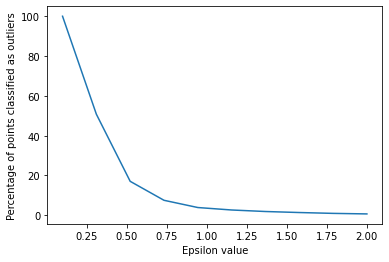

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x=np.linspace(0.1, 2, 10), y=outlier_percent)
plt.ylabel("Percentage of points classified as outliers")
plt.xlabel("Epsilon value")

##### Retraining a DBSCAN model with epsilon value = 0.5, based on the plot created above, and min_samples = 8

In [87]:
eps = 0.5
min_samples = 8

dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric="manhattan", algorithm="brute")
dbscan.fit(scaled_X_monday)

DBSCAN(algorithm='brute', metric='manhattan', min_samples=8)

In [88]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([2019, 8196,  235,  176,   72,   15,    6,    7,    5,    7,    7,
          10]))

In [89]:
monday["cluster"] = dbscan.labels_
monday.head()

,Lat,Lon,Hour,Minutes,DayOfWeek,cluster
66945,40.7224,-73.9887,9,29,Monday,0
268379,40.6843,-73.8211,19,37,Monday,-1
383369,40.7648,-73.9761,20,35,Monday,0
430220,40.6736,-73.9774,14,43,Monday,-1
195292,40.7286,-73.9941,18,23,Monday,0


##### A scatterplot to see how the DBSCAN algorithm has clustered the pick-up points, except outliers, in New York city on Mondays

In [90]:
fig_monday_cluster = px.scatter_mapbox(
        monday[monday.cluster != -1], 
        lat="Lat", 
        lon="Lon",
        color="cluster",
        mapbox_style="carto-positron"
)

fig_monday_cluster.show()

### Picking Tuesday to observe how the clustering algorithm behaves

In [91]:
tuesday.shape

(16369, 8)

In [92]:
fig_tuesday = px.scatter_mapbox(
        tuesday, 
        lat="Lat", 
        lon="Lon",
        mapbox_style="carto-positron"
)
fig_tuesday.show()

##### Dropping unnecessary columns of the dataset

In [93]:
tuesday = tuesday.drop(columns=["Year", "Month", "Day"])

In [94]:
tuesday.head()

,Lat,Lon,Hour,Minutes,DayOfWeek
112412,40.7385,-73.9882,21,56,Tuesday
72159,40.6772,-73.9823,8,36,Tuesday
440386,40.6801,-73.9969,21,31,Tuesday
146187,40.7108,-74.0062,8,44,Tuesday
24028,40.7455,-73.9752,14,24,Tuesday


##### Scaling numerical data and one-hot encoding categorical data

In [95]:
numeric_features = [0, 1, 2, 3] # Positions of numerical variables
numeric_transformer = StandardScaler()

# Creation of the transformer for categorical values
categorical_features = [4] # Positions of categorical variables
categorical_transformer = OneHotEncoder(drop='first')

# Combining the transformers in ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

print("Preprocessing on dataset...")
print(tuesday.head())
scaled_X_tuesday = preprocessor.fit_transform(tuesday)
print('...Completed.')
print(scaled_X_tuesday[0:5, :])
print()

Preprocessing on dataset...
            Lat      Lon  Hour  Minutes DayOfWeek
112412  40.7385 -73.9882    21       56   Tuesday
72159   40.6772 -73.9823     8       36   Tuesday
440386  40.6801 -73.9969    21       31   Tuesday
146187  40.7108 -74.0062     8       44   Tuesday
24028   40.7455 -73.9752    14       24   Tuesday
...Completed.
[[-0.10692853 -0.21810336  1.19635069  1.53885944]
 [-1.83998451 -0.0953761  -1.19526051  0.37982477]
 [-1.75799654 -0.39907407  1.19635069  0.09006611]
 [-0.89005497 -0.59252551 -1.19526051  0.84343864]
 [ 0.09097346  0.05231264 -0.09143996 -0.31559603]]



#####  Use DBSCAN and a for loop to create a variety of models testing different epsilon values

In [96]:
from sklearn.cluster import DBSCAN

outlier_percent = []

for eps in np.linspace(0.1, 2, 10):
    
    # Create Model
    dbscan = DBSCAN(eps=eps,min_samples=2*scaled_X_tuesday.shape[1], metric="manhattan", algorithm="brute")
    dbscan.fit(scaled_X_tuesday)
   
     
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)

##### Creating a line plot of the percentage of outlier points versus the epsilon value choice

Text(0.5, 0, 'Epsilon value')

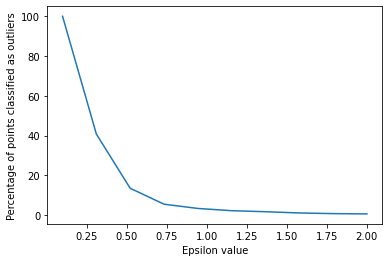

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x=np.linspace(0.1, 2, 10), y=outlier_percent)
plt.ylabel("Percentage of points classified as outliers")
plt.xlabel("Epsilon value")

##### Retraining a DBSCAN model with epsilon value = 0.5, based on the plot created above, and min_samples = 8

In [98]:
eps = 0.5
dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric="manhattan", algorithm="brute")
dbscan.fit(scaled_X_tuesday)

DBSCAN(algorithm='brute', metric='manhattan', min_samples=8)

In [99]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 array([ 2456, 13148,     7,   191,    23,   182,    15,    52,    44,
           23,    19,    28,     9,     9,    11,    35,    15,    11,
           10,    13,     8,     4,     7,     7,     8,     2,     9,
            9,     6,     8]))

In [100]:
tuesday["cluster"] = dbscan.labels_
tuesday.head()

,Lat,Lon,Hour,Minutes,DayOfWeek,cluster
112412,40.7385,-73.9882,21,56,Tuesday,0
72159,40.6772,-73.9823,8,36,Tuesday,-1
440386,40.6801,-73.9969,21,31,Tuesday,-1
146187,40.7108,-74.0062,8,44,Tuesday,0
24028,40.7455,-73.9752,14,24,Tuesday,0


##### A scatterplot to see how the DBSCAN algorithm has clustered the pick-up points, except outliers, in New York city on Tuesdays

In [101]:
fig_tuesday_cluster = px.scatter_mapbox(
        tuesday[tuesday.cluster != -1], 
        lat="Lat", 
        lon="Lon",
        color="cluster",
        mapbox_style="carto-positron"
)

fig_tuesday_cluster.show()

### Picking Wednesday to observe how the clustering algorithm behaves

In [102]:
wednesday.shape

(19166, 8)

In [103]:
fig_wednesday = px.scatter_mapbox(
        wednesday, 
        lat="Lat", 
        lon="Lon",
        mapbox_style="carto-positron"
)

fig_wednesday.show()

##### Dropping unnecessary columns of the dataset

In [104]:
wednesday = wednesday.drop(columns=["Year", "Month", "Day"])

In [105]:
wednesday.head()

,Lat,Lon,Hour,Minutes,DayOfWeek
324948,40.7332,-73.9985,19,5,Wednesday
340411,40.7640,-73.9775,23,1,Wednesday
25706,40.7585,-73.9689,21,24,Wednesday
273905,40.7418,-74.0043,11,14,Wednesday
78387,40.7611,-73.9798,16,4,Wednesday


##### Scaling numerical data and one-hot encoding categorical data

In [106]:
numeric_features = [0, 1, 2, 3] # Positions of numerical variables
numeric_transformer = StandardScaler()

# Creation of the transformer for categorical values
categorical_features = [4] # Positions of categorical variables
categorical_transformer = OneHotEncoder(drop='first')

# Combining the transformers in ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

print("Preprocessing on dataset...")
print(wednesday.head())
scaled_X_wednesday = preprocessor.fit_transform(wednesday)
print('...Completed.')
print(scaled_X_wednesday[0:5, :])
print()

Preprocessing on dataset...
            Lat      Lon  Hour  Minutes  DayOfWeek
324948  40.7332 -73.9985    19        5  Wednesday
340411  40.7640 -73.9775    23        1  Wednesday
25706   40.7585 -73.9689    21       24  Wednesday
273905  40.7418 -74.0043    11       14  Wednesday
78387   40.7611 -73.9798    16        4  Wednesday
...Completed.
[[-0.28621353 -0.44760182  0.82508329 -1.40020057]
 [ 0.6199843  -0.00302028  1.56812251 -1.63077131]
 [ 0.45816326  0.17904645  1.1966029  -0.30498954]
 [-0.03318427 -0.57039101 -0.66099514 -0.8814164 ]
 [ 0.53466048 -0.05171254  0.26780388 -1.45784326]]



#####  Use DBSCAN and a for loop to create a variety of models testing different epsilon values

In [107]:
from sklearn.cluster import DBSCAN

outlier_percent = []

for eps in np.linspace(0.1, 2, 10):
    
    # Create Model
    dbscan = DBSCAN(eps=eps,min_samples=2*scaled_X_wednesday.shape[1], metric="manhattan", algorithm="brute")
    dbscan.fit(scaled_X_wednesday)
   
     
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)

##### Creating a line plot of the percentage of outlier points versus the epsilon value choice

Text(0.5, 0, 'Epsilon value')

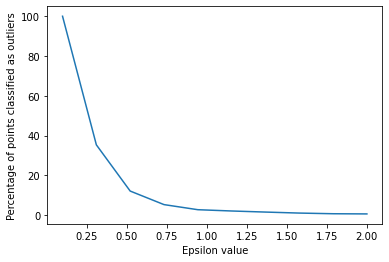

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x=np.linspace(0.1, 2, 10), y=outlier_percent)
plt.ylabel("Percentage of points classified as outliers")
plt.xlabel("Epsilon value")

##### Retraining a DBSCAN model with epsilon value = 0.5, based on the plot created above, and min_samples = 8

In [109]:
eps = 0.5
min_samples = 8
dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric="manhattan", algorithm="brute")
dbscan.fit(scaled_X_wednesday)

DBSCAN(algorithm='brute', metric='manhattan', min_samples=8)

In [110]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21]),
 array([ 2546, 15766,   258,   295,    12,    26,    17,    34,    22,
           22,    20,    18,    54,    11,     6,    10,     7,     9,
            8,     7,     8,     5,     5]))

In [111]:
wednesday["cluster"] = dbscan.labels_
wednesday.head()

,Lat,Lon,Hour,Minutes,DayOfWeek,cluster
324948,40.7332,-73.9985,19,5,Wednesday,0
340411,40.7640,-73.9775,23,1,Wednesday,0
25706,40.7585,-73.9689,21,24,Wednesday,0
273905,40.7418,-74.0043,11,14,Wednesday,0
78387,40.7611,-73.9798,16,4,Wednesday,0


##### A scatterplot to see how the DBSCAN algorithm has clustered the pick-up points, except outliers, in New York city on Wednesdays

In [112]:
fig_wednesday_cluster = px.scatter_mapbox(
        wednesday[wednesday.cluster != -1], 
        lat="Lat", 
        lon="Lon",
        color="cluster",
        mapbox_style="carto-positron"
)

fig_wednesday_cluster.show()

### Picking Thursday to observe how the clustering algorithm behaves

In [113]:
thursday.shape

(15118, 8)

In [114]:
fig_thursday = px.scatter_mapbox(
        thursday, 
        lat="Lat", 
        lon="Lon",
        mapbox_style="carto-positron"
)

fig_thursday.show()

##### Dropping unnecessary columns of the dataset

In [115]:
thursday = thursday.drop(columns=["Year", "Month", "Day"])

In [116]:
thursday.head()

,Lat,Lon,Hour,Minutes,DayOfWeek
83621,40.7741,-73.8724,16,7,Thursday
402381,40.7515,-73.9760,16,14,Thursday
164529,40.6417,-73.7890,20,6,Thursday
229997,40.6534,-73.7869,23,43,Thursday
453963,40.7631,-73.9685,18,34,Thursday


##### Scaling numerical data and one-hot encoding categorical data

In [117]:
numeric_features = [0, 1, 2, 3] # Positions of numerical variables
numeric_transformer = StandardScaler()

# Creation of the transformer for categorical values
categorical_features = [4] # Positions of categorical variables
categorical_transformer = OneHotEncoder(drop='first')

# Combining the transformers in ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

print("Preprocessing on dataset...")
print(thursday.head())
scaled_X_thursday = preprocessor.fit_transform(thursday)
print('...Completed.')
print(scaled_X_thursday[0:5, :])
print()

Preprocessing on dataset...
            Lat      Lon  Hour  Minutes DayOfWeek
83621   40.7741 -73.8724    16        7  Thursday
402381  40.7515 -73.9760    16       14  Thursday
164529  40.6417 -73.7890    20        6  Thursday
229997  40.6534 -73.7869    23       43  Thursday
453963  40.7631 -73.9685    18       34  Thursday
...Completed.
[[ 0.95868646  2.15352707  0.18570808 -1.30209651]
 [ 0.29421433  0.02927106  0.18570808 -0.89709983]
 [-2.93406174  3.86359417  0.90214436 -1.35995318]
 [-2.59006511  3.90665342  1.43947158  0.78074355]
 [ 0.63527082  0.18305407  0.54392622  0.26003354]]



#####  Use DBSCAN and a for loop to create a variety of models testing different epsilon values

In [118]:
from sklearn.cluster import DBSCAN

outlier_percent = []

for eps in np.linspace(0.1, 2, 10):
    
    # Create Model
    dbscan = DBSCAN(eps=eps,min_samples=2*scaled_X_thursday.shape[1], metric="manhattan", algorithm="brute")
    dbscan.fit(scaled_X_thursday)
   
     
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)

##### Creating a line plot of the percentage of outlier points versus the epsilon value choice

Text(0.5, 0, 'Epsilon value')

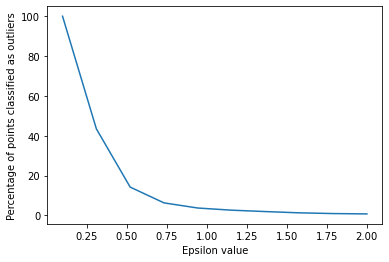

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x=np.linspace(0.1, 2, 10), y=outlier_percent)
plt.ylabel("Percentage of points classified as outliers")
plt.xlabel("Epsilon value")

##### Retraining a DBSCAN model with epsilon value = 0.5, based on the plot created above, and min_samples = 8

In [120]:
eps = 0.5
dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric="manhattan", algorithm="brute")
dbscan.fit(scaled_X_thursday)

DBSCAN(algorithm='brute', metric='manhattan', min_samples=8)

In [121]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22]),
 array([ 2355,   286, 11989,    27,   193,    14,    10,    40,    12,
            8,    15,    26,    12,    21,     8,    18,    11,    21,
           18,     5,     5,    10,     6,     8]))

In [122]:
thursday["cluster"] = dbscan.labels_
thursday.head()

,Lat,Lon,Hour,Minutes,DayOfWeek,cluster
83621,40.7741,-73.8724,16,7,Thursday,0
402381,40.7515,-73.9760,16,14,Thursday,1
164529,40.6417,-73.7890,20,6,Thursday,3
229997,40.6534,-73.7869,23,43,Thursday,-1
453963,40.7631,-73.9685,18,34,Thursday,1


##### A scatterplot to see how the DBSCAN algorithm has clustered the pick-up points, except outliers, in New York city on Thursdays

In [123]:
fig_thursday_cluster = px.scatter_mapbox(
        thursday[thursday.cluster != -1], 
        lat="Lat", 
        lon="Lon",
        color="cluster",
        mapbox_style="carto-positron"
)

fig_thursday_cluster.show()

### Picking Friday to observe how the clustering algorithm behaves

In [124]:
friday.shape

(16040, 8)

In [125]:
fig_friday = px.scatter_mapbox(
        friday, 
        lat="Lat", 
        lon="Lon",
        mapbox_style="carto-positron"
)

fig_friday.show()

##### Dropping unnecessary columns of the dataset

In [126]:
friday = friday.drop(columns=["Year", "Month", "Day"])

In [127]:
friday.head()

,Lat,Lon,Hour,Minutes,DayOfWeek
506608,40.7294,-73.9933,15,28,Friday
20838,40.7543,-73.9873,13,16,Friday
5313,40.7668,-73.9675,20,38,Friday
462655,40.7253,-73.9998,20,48,Friday
50485,40.7388,-74.0089,9,18,Friday


##### Scaling numerical data and one-hot encoding categorical data

In [128]:
numeric_features = [0, 1, 2, 3] # Positions of numerical variables
numeric_transformer = StandardScaler()

# Creation of the transformer for categorical values
categorical_features = [4] # Positions of categorical variables
categorical_transformer = OneHotEncoder(drop='first')

# Combining the transformers in ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

print("Preprocessing on dataset...")
print(friday.head())
scaled_X_friday = preprocessor.fit_transform(friday)
print('...Completed.')
print(scaled_X_friday[0:5, :])
print()

Preprocessing on dataset...
            Lat      Lon  Hour  Minutes DayOfWeek
506608  40.7294 -73.9933    15       28    Friday
20838   40.7543 -73.9873    13       16    Friday
5313    40.7668 -73.9675    20       38    Friday
462655  40.7253 -73.9998    20       48    Friday
50485   40.7388 -74.0089     9       18    Friday
...Completed.
[[-0.32695001 -0.31868323  0.00164975 -0.09574532]
 [ 0.41053813 -0.18739404 -0.33979465 -0.78830673]
 [ 0.78076309  0.24586029  0.85526074  0.48138919]
 [-0.4483838  -0.46091319  0.85526074  1.0585237 ]
 [-0.04854083 -0.66003514 -1.02268345 -0.67287983]]



#####  Use DBSCAN and a for loop to create a variety of models testing different epsilon values

In [129]:
from sklearn.cluster import DBSCAN

outlier_percent = []

for eps in np.linspace(0.1, 2, 10):
    
    # Create Model
    dbscan = DBSCAN(eps=eps,min_samples=2*scaled_X_friday.shape[1], metric="manhattan", algorithm="brute")
    dbscan.fit(scaled_X_friday)
   
     
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)

##### Creating a line plot of the percentage of outlier points versus the epsilon value choice

Text(0.5, 0, 'Epsilon value')

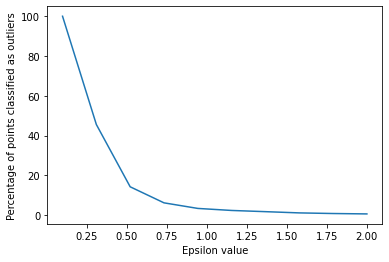

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x=np.linspace(0.1, 2, 10), y=outlier_percent)
plt.ylabel("Percentage of points classified as outliers")
plt.xlabel("Epsilon value")

##### Retraining a DBSCAN model with epsilon value = 0.5, based on the plot created above, and min_samples = 8

In [131]:
eps = 0.5
dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric="manhattan", algorithm="brute")
dbscan.fit(scaled_X_friday)

DBSCAN(algorithm='brute', metric='manhattan', min_samples=8)

In [132]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 array([ 2540, 12882,    40,    96,    51,    15,    35,    16,    28,
          104,    18,    15,    12,     8,     5,    22,    15,    12,
           30,    23,    12,     6,     8,     8,     8,     8,    10,
            7,     6]))

In [133]:
friday["cluster"] = dbscan.labels_
friday.head()

,Lat,Lon,Hour,Minutes,DayOfWeek,cluster
506608,40.7294,-73.9933,15,28,Friday,0
20838,40.7543,-73.9873,13,16,Friday,0
5313,40.7668,-73.9675,20,38,Friday,0
462655,40.7253,-73.9998,20,48,Friday,0
50485,40.7388,-74.0089,9,18,Friday,0


##### A scatterplot to see how the DBSCAN algorithm has clustered the pick-up points, except outliers, in New York city on Fridays

In [134]:
fig_friday_cluster = px.scatter_mapbox(
        friday[friday.cluster != -1], 
        lat="Lat", 
        lon="Lon",
        color="cluster",
        mapbox_style="carto-positron"
)

fig_friday_cluster.show()

### Picking Saturday to observe how the clustering algorithm behaves

In [135]:
saturday.shape

(13563, 8)

In [136]:
fig_saturday = px.scatter_mapbox(
        saturday, 
        lat="Lat", 
        lon="Lon",
        mapbox_style="carto-positron"
)

fig_saturday.show()

##### Dropping unnecessary columns of the dataset

In [137]:
saturday = saturday.drop(columns=["Year", "Month", "Day"])

In [138]:
saturday.head()

,Lat,Lon,Hour,Minutes,DayOfWeek
59958,40.7145,-73.9845,19,40,Saturday
420950,40.7211,-73.9942,21,12,Saturday
58678,40.7629,-73.9716,16,36,Saturday
518449,40.7769,-73.9866,18,51,Saturday
21731,40.6448,-73.7823,13,57,Saturday


##### Scaling numerical data and one-hot encoding categorical data

In [139]:
numeric_features = [0, 1, 2, 3] # Positions of numerical variables
numeric_transformer = StandardScaler()

# Creation of the transformer for categorical values
categorical_features = [4] # Positions of categorical variables
categorical_transformer = OneHotEncoder(drop='first')

# Combining the transformers in ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

print("Preprocessing on dataset...")
print(saturday.head())
scaled_X_saturday = preprocessor.fit_transform(saturday)
print('...Completed.')
print(scaled_X_saturday[0:5, :])
print()

Preprocessing on dataset...
            Lat      Lon  Hour  Minutes DayOfWeek
59958   40.7145 -73.9845    19       40  Saturday
420950  40.7211 -73.9942    21       12  Saturday
58678   40.7629 -73.9716    16       36  Saturday
518449  40.7769 -73.9866    18       51  Saturday
21731   40.6448 -73.7823    13       57  Saturday
...Completed.
[[-0.59918153 -0.12862546  0.60009097  0.6012842 ]
 [-0.42182377 -0.34536715  0.90665169 -1.03050528]
 [ 0.70144203  0.15961864  0.14024989  0.36817142]
 [ 1.07765546 -0.17554892  0.44681061  1.24234435]
 [-2.47218696  4.38943323 -0.31959119  1.59201353]]



#####  Use DBSCAN and a for loop to create a variety of models testing different epsilon values

In [140]:
from sklearn.cluster import DBSCAN

outlier_percent = []

for eps in np.linspace(0.1, 2, 10):
    
    # Create Model
    dbscan = DBSCAN(eps=eps,min_samples=2*scaled_X_saturday.shape[1], metric="manhattan", algorithm="brute")
    dbscan.fit(scaled_X_saturday)
   
     
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)

##### Creating a line plot of the percentage of outlier points versus the epsilon value choice

Text(0.5, 0, 'Epsilon value')

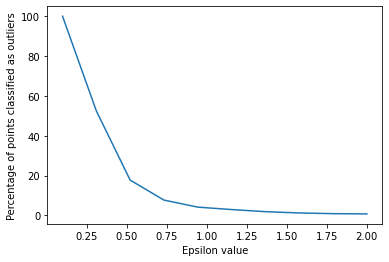

In [141]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x=np.linspace(0.1, 2, 10), y=outlier_percent)
plt.ylabel("Percentage of points classified as outliers")
plt.xlabel("Epsilon value")

##### Retraining a DBSCAN model with epsilon value = 0.6, based on the plot created above, and min_samples = 8

In [142]:
eps = 0.6
dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric="manhattan", algorithm="brute")
dbscan.fit(scaled_X_saturday)

DBSCAN(algorithm='brute', eps=0.6, metric='manhattan', min_samples=8)

In [143]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17]),
 array([ 1692, 11628,    81,     7,    16,     8,     8,     8,    20,
            8,    25,     6,     8,     8,     7,     5,     9,     7,
           12]))

In [144]:
saturday["cluster"] = dbscan.labels_
saturday.head()

,Lat,Lon,Hour,Minutes,DayOfWeek,cluster
59958,40.7145,-73.9845,19,40,Saturday,0
420950,40.7211,-73.9942,21,12,Saturday,0
58678,40.7629,-73.9716,16,36,Saturday,0
518449,40.7769,-73.9866,18,51,Saturday,0
21731,40.6448,-73.7823,13,57,Saturday,1


##### A scatterplot to see how the DBSCAN algorithm has clustered the pick-up points, except outliers, in New York city on Saturdays

In [145]:
fig_saturday_cluster = px.scatter_mapbox(
        saturday[saturday.cluster != -1], 
        lat="Lat", 
        lon="Lon",
        color="cluster",
        mapbox_style="carto-positron"
)

fig_saturday_cluster.show()

## Hot zones per day of week in New York City with DBSCAN

## Showing clusters per hour for Sunday

In [146]:
sunday_sort = sunday.sort_values(by=["Hour"])

In [147]:
fig_sunday_cluster = px.scatter_mapbox(
    sunday_sort[sunday_sort.cluster != -1],
    lat="Lat",
    lon="Lon",
    color="cluster",
    mapbox_style="carto-positron",
    color_continuous_scale=None,
    zoom=10,
    animation_frame="Hour",
)


fig_sunday_cluster.update_layout(
    autosize=False,
    width=600,
    height=600,
    showlegend=False,
    title= "Traffic by hour on Sunday"
      )
img_name = "Traffic by hour on Sunday"
fig_sunday_cluster.write_html(img_name)
fig_sunday_cluster.show()

### Showing clusters per hour for Monday

In [148]:
monday_sort = monday.sort_values(by=["Hour"])
fig_monday_cluster = px.scatter_mapbox(
    monday_sort[monday_sort.cluster != -1],
    lat="Lat",
    lon="Lon",
    color="cluster",
    mapbox_style="carto-positron",
    color_continuous_scale=None,
    zoom=10,
    animation_frame="Hour",
)


fig_monday_cluster.update_layout(
    autosize=False,
    width=600,
    height=600,
    showlegend=False,
    title= "Traffic by hour on Monday"
      )
img_name = "Traffic by hour on Monday"
fig_monday_cluster.write_html(img_name)
fig_monday_cluster.show()

### Showing clusters per hour for Tuesday

In [149]:
tuesday_sort = tuesday.sort_values(by=["Hour"])
fig_tuesday_cluster = px.scatter_mapbox(
    tuesday_sort[tuesday_sort.cluster != -1],
    lat="Lat",
    lon="Lon",
    color="cluster",
    mapbox_style="carto-positron",
    color_continuous_scale=None,
    zoom=10,
    animation_frame="Hour",
)


fig_tuesday_cluster.update_layout(
    autosize=False,
    width=600,
    height=600,
    showlegend=False,
    title= "Traffic by hour on Tuesday"
      )
img_name = "Traffic by hour on Tuesday"
fig_tuesday_cluster.write_html(img_name)
fig_tuesday_cluster.show()

### Showing clusters per hour for Wednesday

In [150]:
wednesday_sort = wednesday.sort_values(by=["Hour"])
fig_wednesday_cluster = px.scatter_mapbox(
    wednesday_sort[wednesday_sort.cluster != -1],
    lat="Lat",
    lon="Lon",
    color="cluster",
    mapbox_style="carto-positron",
    color_continuous_scale=None,
    zoom=10,
    animation_frame="Hour",
)


fig_wednesday_cluster.update_layout(
    autosize=False,
    width=600,
    height=600,
    showlegend=False,
    title= "Traffic by hour on Wednesday"
      )
img_name = "Traffic by hour on Wednesday"
fig_wednesday_cluster.write_html(img_name)
fig_wednesday_cluster.show()

### Showing clusters per hour for Thursday

In [151]:
thursday_sort = thursday.sort_values(by=["Hour"])
fig_thursday_cluster = px.scatter_mapbox(
    thursday_sort[thursday_sort.cluster != -1],
    lat="Lat",
    lon="Lon",
    color="cluster",
    mapbox_style="carto-positron",
    color_continuous_scale=None,
    zoom=10,
    animation_frame="Hour",
)


fig_thursday_cluster.update_layout(
    autosize=False,
    width=600,
    height=600,
    showlegend=False,
    title= "Traffic by hour on Thursday"
      )
img_name = "Traffic by hour on Thursday"
fig_thursday_cluster.write_html(img_name)
fig_thursday_cluster.show()

### Showing clusters per hour for Friday

In [152]:
friday_sort = friday.sort_values(by=["Hour"])
fig_friday_cluster = px.scatter_mapbox(
    friday_sort[friday_sort.cluster != -1],
    lat="Lat",
    lon="Lon",
    color="cluster",
    mapbox_style="carto-positron",
    color_continuous_scale=None,
    zoom=10,
    animation_frame="Hour",
)


fig_friday_cluster.update_layout(
    autosize=False,
    width=600,
    height=600,
    showlegend=False,
    title= "Traffic by hour on Friday"
      )
img_name = "Traffic by hour on Friday"
fig_friday_cluster.write_html(img_name)
fig_friday_cluster.show()

### Showing clusters per hour for Saturday

In [153]:
saturday_sort = saturday.sort_values(by=["Hour"])
fig_saturday_cluster = px.scatter_mapbox(
    saturday_sort[saturday_sort.cluster != -1],
    lat="Lat",
    lon="Lon",
    color="cluster",
    mapbox_style="carto-positron",
    color_continuous_scale=None,
    zoom=10,
    animation_frame="Hour",
)


fig_saturday_cluster.update_layout(
    autosize=False,
    width=600,
    height=600,
    showlegend=False,
    title= "Traffic by hour on Saturday"
      )
img_name = "Traffic by hour on Saturday"
fig_saturday_cluster.write_html(img_name)
fig_saturday_cluster.show()

### Picking Sunday to observe how the K-means clustering algorithm behaves

In [154]:
sunday.head()

,Lat,Lon,Hour,Minutes,DayOfWeek,cluster
15367,40.7630,-73.9715,11,56,Sunday,0
375728,40.7183,-74.0070,22,15,Sunday,0
189865,40.7199,-74.0003,18,22,Sunday,0
522402,40.7196,-73.9980,1,14,Sunday,0
372604,40.7076,-74.0030,11,20,Sunday,0


In [155]:
sunday = sunday.drop("DayOfWeek", axis = 1)
sunday = sunday.drop("cluster",  axis = 1)

##### Scaling numerical data and one-hot encoding categorical data

In [156]:
# Import Standard Scaler
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
# StandardScaler will substract mean and divide by standard deviation to each observation
sc = StandardScaler()

# Apply StandardScaler to X
X = sc.fit_transform(sunday)

# Visualize first five rows 
# Standard scaler transform X as numpy array. Therefore you can't use .head()
X[:5]

array([[ 0.67794454, -0.01855794, -0.14193475,  1.56507666],
       [-0.3480714 , -0.56800173,  1.43975876, -0.79483578],
       [-0.31134599, -0.46430389,  0.86459748, -0.3919239 ],
       [-0.31823201, -0.42870612, -1.57983795, -0.85239462],
       [-0.59367253, -0.50609257, -0.14193475, -0.50704158]])

##### Determining how many clusters we should have using the Elbow method

In [157]:
from sklearn.cluster import KMeans
# Creating a loop that will collect the Within-sum-of-square (wcss) for each value of K 
# Use .inertia_ parameter to get the within sum of square value for each value of K 
wcss =  []
k = []
for i in range (1,11): 
    kmeans = KMeans(n_clusters= i, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    k.append(i)
    print("WCSS for K={} --> {}".format(i, wcss[-1]))

WCSS for K=1 --> 35956.00000000013
WCSS for K=2 --> 29067.185984802603
WCSS for K=3 --> 23946.920230913238
WCSS for K=4 --> 19237.742654593774
WCSS for K=5 --> 17260.693751052426
WCSS for K=6 --> 15565.182441921506
WCSS for K=7 --> 13815.078393153308
WCSS for K=8 --> 12622.59163808608
WCSS for K=9 --> 11501.9834723667
WCSS for K=10 --> 10788.52101680992


##### Visualizing inertia as a function of K using plotly

In [158]:
import plotly.express as px

# Create DataFrame
wcss_frame = pd.DataFrame(wcss)
k_frame = pd.Series(k)

# Create figure
fig= px.line(
    wcss_frame,
    x=k_frame,
    y=wcss_frame.iloc[:,-1]
)

# Create title and axis labels
fig.update_layout(
    yaxis_title="Inertia",
    xaxis_title="# Clusters",
    title="Inertia per cluster"
)

# Render
#fig.show(renderer="notebook")
fig.show(renderer="iframe")

##### It can be seen above that after K=4, inertia is not decreasing a lot.

##### Double-checking with the Silhouette method

In [159]:
# Import silhouette score
from sklearn.metrics import silhouette_score

# Computer mean silhouette score
sil = []
k = []

## Careful, you need to start at i=2 as silhouette score cannot accept less than 2 labels 
for i in range (2,11): 
    kmeans = KMeans(n_clusters= i, init = "k-means++", random_state = 0)
    kmeans.fit(X)
    sil.append(silhouette_score(X, kmeans.predict(X)))
    k.append(i)
    print("Silhouette score for K={} is {}".format(i, sil[-1]))

Silhouette score for K=2 is 0.23264712086265713
Silhouette score for K=3 is 0.2751484789518204
Silhouette score for K=4 is 0.29199660188904253
Silhouette score for K=5 is 0.27615916339880625
Silhouette score for K=6 is 0.27642667893701917
Silhouette score for K=7 is 0.2730793022436179
Silhouette score for K=8 is 0.28412448790400574
Silhouette score for K=9 is 0.2927388296041298
Silhouette score for K=10 is 0.2706210541073749


##### Visualizing inertia as a function of K using plotly

In [160]:
# Create a data frame 
cluster_scores=pd.DataFrame(sil)
k_frame = pd.Series(k)

# Create figure
fig = px.bar(data_frame=cluster_scores,  
             x=k, 
             y=cluster_scores.iloc[:, -1]
            )

# Add title and axis labels
fig.update_layout(
    yaxis_title="Silhouette Score",
    xaxis_title="# Clusters",
    title="Silhouette Score per cluster"
)

# Render
#fig.show(renderer="notebook")
fig.show(renderer="iframe") # if using workspace

##### The Silhouette method also suggests that K=4 is appropriate

In [161]:
# Import K-Means 
from sklearn.cluster import KMeans

# Instanciate KMeans with k=4 and initialisation with k-means++
# You should always use k-means++ as it alleviate the problem of local minimum convergence 
kmeans = KMeans(n_clusters=4, init = "k-means++", random_state=0)

# Fit kmeans to our dataset
kmeans.fit(X)

KMeans(n_clusters=4, random_state=0)

In [162]:
sunday.head()

,Lat,Lon,Hour,Minutes
15367,40.7630,-73.9715,11,56
375728,40.7183,-74.0070,22,15
189865,40.7199,-74.0003,18,22
522402,40.7196,-73.9980,1,14
372604,40.7076,-74.0030,11,20


In [163]:
sunday.loc[:,"Kmeans_Clusters"] = kmeans.predict(X)

In [164]:
sunday.head()

,Lat,Lon,Hour,Minutes,Kmeans_Clusters
15367,40.7630,-73.9715,11,56,2
375728,40.7183,-74.0070,22,15,1
189865,40.7199,-74.0003,18,22,1
522402,40.7196,-73.9980,1,14,3
372604,40.7076,-74.0030,11,20,1


##### A scatterplot to see how the Kmeans algorithm has clustered the pick-up points in New York city on Sundays

In [165]:
fig = px.scatter_mapbox(sunday,
                        lat="Lat",
                        lon="Lon",
                        color="Kmeans_Clusters",hover_name="Kmeans_Clusters",
                        mapbox_style="carto-positron", zoom = 10)
fig.show()

### Picking Monday to observe how the K-means clustering algorithm behaves

In [166]:
monday.head()

,Lat,Lon,Hour,Minutes,DayOfWeek,cluster
66945,40.7224,-73.9887,9,29,Monday,0
268379,40.6843,-73.8211,19,37,Monday,-1
383369,40.7648,-73.9761,20,35,Monday,0
430220,40.6736,-73.9774,14,43,Monday,-1
195292,40.7286,-73.9941,18,23,Monday,0


In [167]:
monday = monday.drop("DayOfWeek", axis = 1)
monday = monday.drop("cluster",  axis = 1)

In [168]:
monday.head()

,Lat,Lon,Hour,Minutes
66945,40.7224,-73.9887,9,29
268379,40.6843,-73.8211,19,37
383369,40.7648,-73.9761,20,35
430220,40.6736,-73.9774,14,43
195292,40.7286,-73.9941,18,23


##### Scaling numerical data and one-hot encoding categorical data

In [169]:
# Import Standard Scaler
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
# StandardScaler will substract mean and divide by standard deviation to each observation
sc = StandardScaler()

# Apply StandardScaler to X
X = sc.fit_transform(monday)

# Visualize first five rows 
# Standard scaler transform X as numpy array. Therefore you can't use .head()
X[:5]

array([[-0.46897436, -0.27068791, -0.89700539, -0.01688367],
       [-1.45353508,  2.68993553,  0.92754174,  0.44737678],
       [ 0.62670476, -0.04811121,  1.10999645,  0.33131167],
       [-1.73003901, -0.07107547,  0.01526818,  0.79557212],
       [-0.30875713, -0.36607793,  0.74508703, -0.36507901]])

##### Determining how many clusters we should have using the Elbow method

In [170]:
from sklearn.cluster import KMeans
# Creating a loop that will collect the Within-sum-of-square (wcss) for each value of K 
# Use .inertia_ parameter to get the within sum of square value for each value of K 
wcss =  []
k = []
for i in range (1,11): 
    kmeans = KMeans(n_clusters= i, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    k.append(i)
    print("WCSS for K={} --> {}".format(i, wcss[-1]))

WCSS for K=1 --> 43020.000000000095
WCSS for K=2 --> 34732.61245955672
WCSS for K=3 --> 28410.992958525305
WCSS for K=4 --> 23066.642155409292
WCSS for K=5 --> 20384.101253519406
WCSS for K=6 --> 18073.03030461943
WCSS for K=7 --> 16740.84801715085
WCSS for K=8 --> 15195.929996059105
WCSS for K=9 --> 13961.903395891519
WCSS for K=10 --> 13082.91919540376


##### Visualizing inertia as a function of K using plotly

In [171]:
import plotly.express as px

# Create DataFrame
wcss_frame = pd.DataFrame(wcss)
k_frame = pd.Series(k)

# Create figure
fig= px.line(
    wcss_frame,
    x=k_frame,
    y=wcss_frame.iloc[:,-1]
)

# Create title and axis labels
fig.update_layout(
    yaxis_title="Inertia",
    xaxis_title="# Clusters",
    title="Inertia per cluster"
)

# Render
#fig.show(renderer="notebook")
fig.show(renderer="iframe")

##### It can be seen above that after K=5, inertia is not decreasing a lot.

##### Double-checking with the Silhouette method

In [172]:
# Import silhouette score
from sklearn.metrics import silhouette_score

# Computer mean silhouette score
sil = []
k = []

## Careful, you need to start at i=2 as silhouette score cannot accept less than 2 labels 
for i in range (2,11): 
    kmeans = KMeans(n_clusters= i, init = "k-means++", random_state = 0)
    kmeans.fit(X)
    sil.append(silhouette_score(X, kmeans.predict(X)))
    k.append(i)
    print("Silhouette score for K={} is {}".format(i, sil[-1]))

Silhouette score for K=2 is 0.2558004439465293
Silhouette score for K=3 is 0.2769945035515342
Silhouette score for K=4 is 0.27808003746439586
Silhouette score for K=5 is 0.2890643473247574
Silhouette score for K=6 is 0.2828707105840708
Silhouette score for K=7 is 0.285759416047126
Silhouette score for K=8 is 0.2686645270707951
Silhouette score for K=9 is 0.29931753684039725
Silhouette score for K=10 is 0.26830779678823213


##### Visualizing inertia as a function of K using plotly

In [173]:
# Create a data frame 
cluster_scores=pd.DataFrame(sil)
k_frame = pd.Series(k)

# Create figure
fig = px.bar(data_frame=cluster_scores,  
             x=k, 
             y=cluster_scores.iloc[:, -1]
            )

# Add title and axis labels
fig.update_layout(
    yaxis_title="Silhouette Score",
    xaxis_title="# Clusters",
    title="Silhouette Score per cluster"
)

# Render
#fig.show(renderer="notebook")
fig.show(renderer="iframe") # if using workspace

##### The Silhouette method is suggesting that K=5 is appropriate

In [174]:
# Import K-Means 
from sklearn.cluster import KMeans

# Instanciate KMeans with k=5 and initialisation with k-means++
# You should always use k-means++ as it alleviate the problem of local minimum convergence 
kmeans = KMeans(n_clusters=5, init = "k-means++", random_state=0)

# Fit kmeans to our dataset
kmeans.fit(X)

KMeans(n_clusters=5, random_state=0)

In [175]:
monday.head()

,Lat,Lon,Hour,Minutes
66945,40.7224,-73.9887,9,29
268379,40.6843,-73.8211,19,37
383369,40.7648,-73.9761,20,35
430220,40.6736,-73.9774,14,43
195292,40.7286,-73.9941,18,23


In [176]:
monday.loc[:,"Kmeans_Clusters"] = kmeans.predict(X)

In [177]:
monday.head()

,Lat,Lon,Hour,Minutes,Kmeans_Clusters
66945,40.7224,-73.9887,9,29,2
268379,40.6843,-73.8211,19,37,3
383369,40.7648,-73.9761,20,35,1
430220,40.6736,-73.9774,14,43,1
195292,40.7286,-73.9941,18,23,0


##### A scatterplot to see how the Kmeans algorithm has clustered the pick-up points in New York city on Mondays

In [178]:
fig = px.scatter_mapbox(monday,
                        lat="Lat",
                        lon="Lon",
                        color="Kmeans_Clusters",hover_name="Kmeans_Clusters",
                        mapbox_style="carto-positron", zoom = 10)
fig.show()

### Picking Tuesday to observe how the K-means clustering algorithm behaves

In [179]:
tuesday.head()

,Lat,Lon,Hour,Minutes,DayOfWeek,cluster
112412,40.7385,-73.9882,21,56,Tuesday,0
72159,40.6772,-73.9823,8,36,Tuesday,-1
440386,40.6801,-73.9969,21,31,Tuesday,-1
146187,40.7108,-74.0062,8,44,Tuesday,0
24028,40.7455,-73.9752,14,24,Tuesday,0


In [180]:
tuesday = tuesday.drop("DayOfWeek", axis = 1)
tuesday = tuesday.drop("cluster",  axis = 1)

In [181]:
tuesday.head()

,Lat,Lon,Hour,Minutes
112412,40.7385,-73.9882,21,56
72159,40.6772,-73.9823,8,36
440386,40.6801,-73.9969,21,31
146187,40.7108,-74.0062,8,44
24028,40.7455,-73.9752,14,24


##### Scaling numerical data and one-hot encoding categorical data

In [182]:
# Import Standard Scaler
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
# StandardScaler will substract mean and divide by standard deviation to each observation
sc = StandardScaler()

# Apply StandardScaler to X
X = sc.fit_transform(tuesday)

# Visualize first five rows 
# Standard scaler transform X as numpy array. Therefore you can't use .head()
X[:5]

array([[-0.10692853, -0.21810336,  1.19635069,  1.53885944],
       [-1.83998451, -0.0953761 , -1.19526051,  0.37982477],
       [-1.75799654, -0.39907407,  1.19635069,  0.09006611],
       [-0.89005497, -0.59252551, -1.19526051,  0.84343864],
       [ 0.09097346,  0.05231264, -0.09143996, -0.31559603]])

##### Determining how many clusters we should have using the Elbow method

In [183]:
from sklearn.cluster import KMeans
# Creating a loop that will collect the Within-sum-of-square (wcss) for each value of K 
# Use .inertia_ parameter to get the within sum of square value for each value of K 
wcss =  []
k = []
for i in range (1,11): 
    kmeans = KMeans(n_clusters= i, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    k.append(i)
    print("WCSS for K={} --> {}".format(i, wcss[-1]))

WCSS for K=1 --> 65475.99999999986
WCSS for K=2 --> 53102.62327466715
WCSS for K=3 --> 44350.403089444
WCSS for K=4 --> 35870.4389056162
WCSS for K=5 --> 31548.850550499348
WCSS for K=6 --> 28808.705676160636
WCSS for K=7 --> 26181.68868475675
WCSS for K=8 --> 23694.548484770938
WCSS for K=9 --> 22221.958738993773
WCSS for K=10 --> 20648.69631085349


##### Visualizing inertia as a function of K using plotly

In [184]:
import plotly.express as px

# Create DataFrame
wcss_frame = pd.DataFrame(wcss)
k_frame = pd.Series(k)

# Create figure
fig= px.line(
    wcss_frame,
    x=k_frame,
    y=wcss_frame.iloc[:,-1]
)

# Create title and axis labels
fig.update_layout(
    yaxis_title="Inertia",
    xaxis_title="# Clusters",
    title="Inertia per cluster"
)

# Render
#fig.show(renderer="notebook")
fig.show(renderer="iframe")

##### It can be seen above that after K=4, inertia is not decreasing a lot.

##### Double-checking with the Silhouette method

In [185]:
# Import silhouette score
from sklearn.metrics import silhouette_score

# Computer mean silhouette score
sil = []
k = []

## Careful, you need to start at i=2 as silhouette score cannot accept less than 2 labels 
for i in range (2,11): 
    kmeans = KMeans(n_clusters= i, init = "k-means++", random_state = 0)
    kmeans.fit(X)
    sil.append(silhouette_score(X, kmeans.predict(X)))
    k.append(i)
    print("Silhouette score for K={} is {}".format(i, sil[-1]))

Silhouette score for K=2 is 0.257832792911505
Silhouette score for K=3 is 0.2523118586212884
Silhouette score for K=4 is 0.2723116475116672
Silhouette score for K=5 is 0.276874185795927
Silhouette score for K=6 is 0.2700164358422732
Silhouette score for K=7 is 0.27484796378510795
Silhouette score for K=8 is 0.2779900964353857
Silhouette score for K=9 is 0.23654515826784178
Silhouette score for K=10 is 0.26774819163982605


##### Visualizing inertia as a function of K using plotly

In [186]:
# Create a data frame 
cluster_scores=pd.DataFrame(sil)
k_frame = pd.Series(k)

# Create figure
fig = px.bar(data_frame=cluster_scores,  
             x=k, 
             y=cluster_scores.iloc[:, -1]
            )

# Add title and axis labels
fig.update_layout(
    yaxis_title="Silhouette Score",
    xaxis_title="# Clusters",
    title="Silhouette Score per cluster"
)

# Render
#fig.show(renderer="notebook")
fig.show(renderer="iframe") # if using workspace

##### The Silhouette method is suggesting that K=5 is appropriate

In [187]:
# Import K-Means 
from sklearn.cluster import KMeans

# Instanciate KMeans with k=4 and initialisation with k-means++
# You should always use k-means++ as it alleviate the problem of local minimum convergence 
kmeans = KMeans(n_clusters=4, init = "k-means++", random_state=0)

# Fit kmeans to our dataset
kmeans.fit(X)

KMeans(n_clusters=4, random_state=0)

In [188]:
tuesday.head()

,Lat,Lon,Hour,Minutes
112412,40.7385,-73.9882,21,56
72159,40.6772,-73.9823,8,36
440386,40.6801,-73.9969,21,31
146187,40.7108,-74.0062,8,44
24028,40.7455,-73.9752,14,24


In [189]:
tuesday.loc[:,"Kmeans_Clusters"] = kmeans.predict(X)

In [190]:
tuesday.head()

,Lat,Lon,Hour,Minutes,Kmeans_Clusters
112412,40.7385,-73.9882,21,56,1
72159,40.6772,-73.9823,8,36,2
440386,40.6801,-73.9969,21,31,1
146187,40.7108,-74.0062,8,44,2
24028,40.7455,-73.9752,14,24,3


##### A scatterplot to see how the Kmeans algorithm has clustered the pick-up points in New York city on Tuesdays

In [191]:
fig = px.scatter_mapbox(tuesday,
                        lat="Lat",
                        lon="Lon",
                        color="Kmeans_Clusters",hover_name="Kmeans_Clusters",
                        mapbox_style="carto-positron", zoom = 10)
fig.show()

### Picking Wednesday to observe how the K-means clustering algorithm behaves

In [192]:
wednesday.head()

,Lat,Lon,Hour,Minutes,DayOfWeek,cluster
324948,40.7332,-73.9985,19,5,Wednesday,0
340411,40.7640,-73.9775,23,1,Wednesday,0
25706,40.7585,-73.9689,21,24,Wednesday,0
273905,40.7418,-74.0043,11,14,Wednesday,0
78387,40.7611,-73.9798,16,4,Wednesday,0


In [193]:
wednesday = wednesday.drop("DayOfWeek", axis = 1)
wednesday = wednesday.drop("cluster",  axis = 1)

In [194]:
wednesday.head()

,Lat,Lon,Hour,Minutes
324948,40.7332,-73.9985,19,5
340411,40.7640,-73.9775,23,1
25706,40.7585,-73.9689,21,24
273905,40.7418,-74.0043,11,14
78387,40.7611,-73.9798,16,4


##### Scaling numerical data and one-hot encoding categorical data

In [195]:
# Import Standard Scaler
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
# StandardScaler will substract mean and divide by standard deviation to each observation
sc = StandardScaler()

# Apply StandardScaler to X
X = sc.fit_transform(wednesday)

# Visualize first five rows 
# Standard scaler transform X as numpy array. Therefore you can't use .head()
X[:5]

array([[-0.28621353, -0.44760182,  0.82508329, -1.40020057],
       [ 0.6199843 , -0.00302028,  1.56812251, -1.63077131],
       [ 0.45816326,  0.17904645,  1.1966029 , -0.30498954],
       [-0.03318427, -0.57039101, -0.66099514, -0.8814164 ],
       [ 0.53466048, -0.05171254,  0.26780388, -1.45784326]])

##### Determining how many clusters we should have using the Elbow method

In [196]:
from sklearn.cluster import KMeans
# Creating a loop that will collect the Within-sum-of-square (wcss) for each value of K 
# Use .inertia_ parameter to get the within sum of square value for each value of K 
wcss =  []
k = []
for i in range (1,11): 
    kmeans = KMeans(n_clusters= i, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    k.append(i)
    print("WCSS for K={} --> {}".format(i, wcss[-1]))

WCSS for K=1 --> 76663.99999999984
WCSS for K=2 --> 62178.490136535045
WCSS for K=3 --> 51282.134090642285
WCSS for K=4 --> 41644.01152044906
WCSS for K=5 --> 36708.73511118269
WCSS for K=6 --> 32859.34184986428
WCSS for K=7 --> 30095.3473977195
WCSS for K=8 --> 28031.977433574437
WCSS for K=9 --> 25812.55719823674
WCSS for K=10 --> 23859.8567371395


##### Visualizing inertia as a function of K using plotly

In [197]:
import plotly.express as px

# Create DataFrame
wcss_frame = pd.DataFrame(wcss)
k_frame = pd.Series(k)

# Create figure
fig= px.line(
    wcss_frame,
    x=k_frame,
    y=wcss_frame.iloc[:,-1]
)

# Create title and axis labels
fig.update_layout(
    yaxis_title="Inertia",
    xaxis_title="# Clusters",
    title="Inertia per cluster"
)

# Render
#fig.show(renderer="notebook")
fig.show(renderer="iframe")

##### It can be seen above that after K=5, inertia is not decreasing a lot.

##### Double-checking with the Silhouette method

In [198]:
# Import silhouette score
from sklearn.metrics import silhouette_score

# Computer mean silhouette score
sil = []
k = []

## Careful, you need to start at i=2 as silhouette score cannot accept less than 2 labels 
for i in range (2,11): 
    kmeans = KMeans(n_clusters= i, init = "k-means++", random_state = 0)
    kmeans.fit(X)
    sil.append(silhouette_score(X, kmeans.predict(X)))
    k.append(i)
    print("Silhouette score for K={} is {}".format(i, sil[-1]))

Silhouette score for K=2 is 0.23560894709800767
Silhouette score for K=3 is 0.2565812060156639
Silhouette score for K=4 is 0.27276762090492535
Silhouette score for K=5 is 0.27531420550272306
Silhouette score for K=6 is 0.2700429379096965
Silhouette score for K=7 is 0.2681617895886853
Silhouette score for K=8 is 0.25391567173302526
Silhouette score for K=9 is 0.25301604494802576
Silhouette score for K=10 is 0.25678043016019175


##### Visualizing inertia as a function of K using plotly

In [199]:
# Create a data frame 
cluster_scores=pd.DataFrame(sil)
k_frame = pd.Series(k)

# Create figure
fig = px.bar(data_frame=cluster_scores,  
             x=k, 
             y=cluster_scores.iloc[:, -1]
            )

# Add title and axis labels
fig.update_layout(
    yaxis_title="Silhouette Score",
    xaxis_title="# Clusters",
    title="Silhouette Score per cluster"
)

# Render
#fig.show(renderer="notebook")
fig.show(renderer="iframe") # if using workspace

##### The Silhouette method also suggests that K=5 is appropriate

In [200]:
# Import K-Means 
from sklearn.cluster import KMeans

# Instanciate KMeans with k=5 and initialisation with k-means++
# You should always use k-means++ as it alleviate the problem of local minimum convergence 
kmeans = KMeans(n_clusters=5, init = "k-means++", random_state=0)

# Fit kmeans to our dataset
kmeans.fit(X)

KMeans(n_clusters=5, random_state=0)

In [201]:
wednesday.head()

,Lat,Lon,Hour,Minutes
324948,40.7332,-73.9985,19,5
340411,40.7640,-73.9775,23,1
25706,40.7585,-73.9689,21,24
273905,40.7418,-74.0043,11,14
78387,40.7611,-73.9798,16,4


In [202]:
wednesday.loc[:,"Kmeans_Clusters"] = kmeans.predict(X)

In [203]:
wednesday.head()

,Lat,Lon,Hour,Minutes,Kmeans_Clusters
324948,40.7332,-73.9985,19,5,0
340411,40.7640,-73.9775,23,1,0
25706,40.7585,-73.9689,21,24,0
273905,40.7418,-74.0043,11,14,4
78387,40.7611,-73.9798,16,4,0


##### A scatterplot to see how the Kmeans algorithm has clustered the pick-up points in New York city on Wednesdays

In [204]:
fig = px.scatter_mapbox(wednesday,
                        lat="Lat",
                        lon="Lon",
                        color="Kmeans_Clusters",hover_name="Kmeans_Clusters",
                        mapbox_style="carto-positron", zoom = 10)
fig.show()

### Picking Thursday to observe how the K-means clustering algorithm behaves

In [205]:
thursday.head()

,Lat,Lon,Hour,Minutes,DayOfWeek,cluster
83621,40.7741,-73.8724,16,7,Thursday,0
402381,40.7515,-73.9760,16,14,Thursday,1
164529,40.6417,-73.7890,20,6,Thursday,3
229997,40.6534,-73.7869,23,43,Thursday,-1
453963,40.7631,-73.9685,18,34,Thursday,1


In [206]:
thursday = thursday.drop("DayOfWeek", axis = 1)
thursday = thursday.drop("cluster",  axis = 1)

In [207]:
thursday.head()

,Lat,Lon,Hour,Minutes
83621,40.7741,-73.8724,16,7
402381,40.7515,-73.9760,16,14
164529,40.6417,-73.7890,20,6
229997,40.6534,-73.7869,23,43
453963,40.7631,-73.9685,18,34


##### Scaling numerical data and one-hot encoding categorical data

In [208]:
# Import Standard Scaler
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
# StandardScaler will substract mean and divide by standard deviation to each observation
sc = StandardScaler()

# Apply StandardScaler to X
X = sc.fit_transform(thursday)

# Visualize first five rows 
# Standard scaler transform X as numpy array. Therefore you can't use .head()
X[:5]

array([[ 0.95868646,  2.15352707,  0.18570808, -1.30209651],
       [ 0.29421433,  0.02927106,  0.18570808, -0.89709983],
       [-2.93406174,  3.86359417,  0.90214436, -1.35995318],
       [-2.59006511,  3.90665342,  1.43947158,  0.78074355],
       [ 0.63527082,  0.18305407,  0.54392622,  0.26003354]])

##### Determining how many clusters we should have using the Elbow method

In [209]:
from sklearn.cluster import KMeans
# Creating a loop that will collect the Within-sum-of-square (wcss) for each value of K 
# Use .inertia_ parameter to get the within sum of square value for each value of K 
wcss =  []
k = []
for i in range (1,11): 
    kmeans = KMeans(n_clusters= i, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    k.append(i)
    print("WCSS for K={} --> {}".format(i, wcss[-1]))

WCSS for K=1 --> 60471.999999999985
WCSS for K=2 --> 49086.94897501823
WCSS for K=3 --> 40804.20592643226
WCSS for K=4 --> 32673.114135347423
WCSS for K=5 --> 28601.46863640907
WCSS for K=6 --> 25818.320578734907
WCSS for K=7 --> 23505.419114005934
WCSS for K=8 --> 21459.97220590715
WCSS for K=9 --> 20010.168700478112
WCSS for K=10 --> 18737.52013055446


##### Visualizing inertia as a function of K using plotly

In [210]:
import plotly.express as px

# Create DataFrame
wcss_frame = pd.DataFrame(wcss)
k_frame = pd.Series(k)

# Create figure
fig= px.line(
    wcss_frame,
    x=k_frame,
    y=wcss_frame.iloc[:,-1]
)

# Create title and axis labels
fig.update_layout(
    yaxis_title="Inertia",
    xaxis_title="# Clusters",
    title="Inertia per cluster"
)

# Render
#fig.show(renderer="notebook")
fig.show(renderer="iframe")

##### It can be seen above that after K=5, inertia is not decreasing a lot.

##### Double-checking with the Silhouette method

In [211]:
# Import silhouette score
from sklearn.metrics import silhouette_score

# Computer mean silhouette score
sil = []
k = []

## Careful, you need to start at i=2 as silhouette score cannot accept less than 2 labels 
for i in range (2,11): 
    kmeans = KMeans(n_clusters= i, init = "k-means++", random_state = 0)
    kmeans.fit(X)
    sil.append(silhouette_score(X, kmeans.predict(X)))
    k.append(i)
    print("Silhouette score for K={} is {}".format(i, sil[-1]))

Silhouette score for K=2 is 0.232989168547608
Silhouette score for K=3 is 0.27238056494637125
Silhouette score for K=4 is 0.2792470817952722
Silhouette score for K=5 is 0.2928581217374506
Silhouette score for K=6 is 0.27625638189030427
Silhouette score for K=7 is 0.27992165118359036
Silhouette score for K=8 is 0.2888050125342308
Silhouette score for K=9 is 0.25775918218658267
Silhouette score for K=10 is 0.2639959006465946


##### Visualizing inertia as a function of K using plotly

In [212]:
# Create a data frame 
cluster_scores=pd.DataFrame(sil)
k_frame = pd.Series(k)

# Create figure
fig = px.bar(data_frame=cluster_scores,  
             x=k, 
             y=cluster_scores.iloc[:, -1]
            )

# Add title and axis labels
fig.update_layout(
    yaxis_title="Silhouette Score",
    xaxis_title="# Clusters",
    title="Silhouette Score per cluster"
)

# Render
#fig.show(renderer="notebook")
fig.show(renderer="iframe") # if using workspace

##### The Silhouette method also suggests that K=5 is appropriate

In [213]:
# Import K-Means 
from sklearn.cluster import KMeans

# Instanciate KMeans with k=4 and initialisation with k-means++
# You should always use k-means++ as it alleviate the problem of local minimum convergence 
kmeans = KMeans(n_clusters=5, init = "k-means++", random_state=0)

# Fit kmeans to our dataset
kmeans.fit(X)

KMeans(n_clusters=5, random_state=0)

In [214]:
thursday.head()

,Lat,Lon,Hour,Minutes
83621,40.7741,-73.8724,16,7
402381,40.7515,-73.9760,16,14
164529,40.6417,-73.7890,20,6
229997,40.6534,-73.7869,23,43
453963,40.7631,-73.9685,18,34


In [215]:
thursday.loc[:,"Kmeans_Clusters"] = kmeans.predict(X)

In [216]:
thursday.head()

,Lat,Lon,Hour,Minutes,Kmeans_Clusters
83621,40.7741,-73.8724,16,7,4
402381,40.7515,-73.9760,16,14,2
164529,40.6417,-73.7890,20,6,3
229997,40.6534,-73.7869,23,43,3
453963,40.7631,-73.9685,18,34,1


##### A scatterplot to see how the Kmeans algorithm has clustered the pick-up points in New York city on Thursdays

In [217]:
fig = px.scatter_mapbox(thursday,
                        lat="Lat",
                        lon="Lon",
                        color="Kmeans_Clusters",hover_name="Kmeans_Clusters",
                        mapbox_style="carto-positron", zoom = 10)
fig.show()

### Picking Friday to observe how the K-means clustering algorithm behaves

In [218]:
friday.head()

,Lat,Lon,Hour,Minutes,DayOfWeek,cluster
506608,40.7294,-73.9933,15,28,Friday,0
20838,40.7543,-73.9873,13,16,Friday,0
5313,40.7668,-73.9675,20,38,Friday,0
462655,40.7253,-73.9998,20,48,Friday,0
50485,40.7388,-74.0089,9,18,Friday,0


In [219]:
friday = friday.drop("DayOfWeek", axis = 1)
friday = friday.drop("cluster",  axis = 1)

In [220]:
friday.head()

,Lat,Lon,Hour,Minutes
506608,40.7294,-73.9933,15,28
20838,40.7543,-73.9873,13,16
5313,40.7668,-73.9675,20,38
462655,40.7253,-73.9998,20,48
50485,40.7388,-74.0089,9,18


##### Scaling numerical data and one-hot encoding categorical data

In [221]:
# Import Standard Scaler
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
# StandardScaler will substract mean and divide by standard deviation to each observation
sc = StandardScaler()

# Apply StandardScaler to X
X = sc.fit_transform(friday)

# Visualize first five rows 
# Standard scaler transform X as numpy array. Therefore you can't use .head()
X[:5]

array([[-0.32695001, -0.31868323,  0.00164975, -0.09574532],
       [ 0.41053813, -0.18739404, -0.33979465, -0.78830673],
       [ 0.78076309,  0.24586029,  0.85526074,  0.48138919],
       [-0.4483838 , -0.46091319,  0.85526074,  1.0585237 ],
       [-0.04854083, -0.66003514, -1.02268345, -0.67287983]])

##### Determining how many clusters we should have using the Elbow method

In [222]:
from sklearn.cluster import KMeans
# Creating a loop that will collect the Within-sum-of-square (wcss) for each value of K 
# Use .inertia_ parameter to get the within sum of square value for each value of K 
wcss =  []
k = []
for i in range (1,11): 
    kmeans = KMeans(n_clusters= i, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    k.append(i)
    print("WCSS for K={} --> {}".format(i, wcss[-1]))

WCSS for K=1 --> 64159.99999999988
WCSS for K=2 --> 52098.27675697313
WCSS for K=3 --> 43585.63632167005
WCSS for K=4 --> 35189.802886933714
WCSS for K=5 --> 30904.946225716954
WCSS for K=6 --> 28241.741380411186
WCSS for K=7 --> 25852.133572345225
WCSS for K=8 --> 24136.660145391586
WCSS for K=9 --> 21766.23826500042
WCSS for K=10 --> 20284.5560190545


##### Visualizing inertia as a function of K using plotly

In [223]:
import plotly.express as px

# Create DataFrame
wcss_frame = pd.DataFrame(wcss)
k_frame = pd.Series(k)

# Create figure
fig= px.line(
    wcss_frame,
    x=k_frame,
    y=wcss_frame.iloc[:,-1]
)

# Create title and axis labels
fig.update_layout(
    yaxis_title="Inertia",
    xaxis_title="# Clusters",
    title="Inertia per cluster"
)

# Render
#fig.show(renderer="notebook")
fig.show(renderer="iframe")

##### It can be seen above that after K=4, inertia is not decreasing a lot.

##### Double-checking with the Silhouette method

In [224]:
# Import silhouette score
from sklearn.metrics import silhouette_score

# Computer mean silhouette score
sil = []
k = []

## Careful, you need to start at i=2 as silhouette score cannot accept less than 2 labels 
for i in range (2,11): 
    kmeans = KMeans(n_clusters= i, init = "k-means++", random_state = 0)
    kmeans.fit(X)
    sil.append(silhouette_score(X, kmeans.predict(X)))
    k.append(i)
    print("Silhouette score for K={} is {}".format(i, sil[-1]))

Silhouette score for K=2 is 0.2305609162078008
Silhouette score for K=3 is 0.24637377884061584
Silhouette score for K=4 is 0.26730039369982406
Silhouette score for K=5 is 0.26719138160638595
Silhouette score for K=6 is 0.2525762012589088
Silhouette score for K=7 is 0.2616166015621106
Silhouette score for K=8 is 0.24453546550183505
Silhouette score for K=9 is 0.25059071767297986
Silhouette score for K=10 is 0.23264762471094497


##### Visualizing inertia as a function of K using plotly

In [225]:
# Create a data frame 
cluster_scores=pd.DataFrame(sil)
k_frame = pd.Series(k)

# Create figure
fig = px.bar(data_frame=cluster_scores,  
             x=k, 
             y=cluster_scores.iloc[:, -1]
            )

# Add title and axis labels
fig.update_layout(
    yaxis_title="Silhouette Score",
    xaxis_title="# Clusters",
    title="Silhouette Score per cluster"
)

# Render
#fig.show(renderer="notebook")
fig.show(renderer="iframe") # if using workspace

##### The Silhouette method also suggests that K=4 is appropriate

In [226]:
# Import K-Means 
from sklearn.cluster import KMeans

# Instanciate KMeans with k=4 and initialisation with k-means++
# You should always use k-means++ as it alleviate the problem of local minimum convergence 
kmeans = KMeans(n_clusters=4, init = "k-means++", random_state=0)

# Fit kmeans to our dataset
kmeans.fit(X)

KMeans(n_clusters=4, random_state=0)

In [227]:
friday.head()

,Lat,Lon,Hour,Minutes
506608,40.7294,-73.9933,15,28
20838,40.7543,-73.9873,13,16
5313,40.7668,-73.9675,20,38
462655,40.7253,-73.9998,20,48
50485,40.7388,-74.0089,9,18


In [228]:
friday.loc[:,"Kmeans_Clusters"] = kmeans.predict(X)

In [229]:
friday.head()

,Lat,Lon,Hour,Minutes,Kmeans_Clusters
506608,40.7294,-73.9933,15,28,0
20838,40.7543,-73.9873,13,16,0
5313,40.7668,-73.9675,20,38,2
462655,40.7253,-73.9998,20,48,2
50485,40.7388,-74.0089,9,18,1


##### A scatterplot to see how the Kmeans algorithm has clustered the pick-up points in New York city on Fridays

In [230]:
fig = px.scatter_mapbox(friday,
                        lat="Lat",
                        lon="Lon",
                        color="Kmeans_Clusters",hover_name="Kmeans_Clusters",
                        mapbox_style="carto-positron", zoom = 10)
fig.show()

### Picking Saturday to observe how the K-means clustering algorithm behaves

In [231]:
saturday.head()

,Lat,Lon,Hour,Minutes,DayOfWeek,cluster
59958,40.7145,-73.9845,19,40,Saturday,0
420950,40.7211,-73.9942,21,12,Saturday,0
58678,40.7629,-73.9716,16,36,Saturday,0
518449,40.7769,-73.9866,18,51,Saturday,0
21731,40.6448,-73.7823,13,57,Saturday,1


In [232]:
saturday = saturday.drop("DayOfWeek", axis = 1)
saturday = saturday.drop("cluster",  axis = 1)

In [233]:
saturday.head()

,Lat,Lon,Hour,Minutes
59958,40.7145,-73.9845,19,40
420950,40.7211,-73.9942,21,12
58678,40.7629,-73.9716,16,36
518449,40.7769,-73.9866,18,51
21731,40.6448,-73.7823,13,57


##### Scaling numerical data and one-hot encoding categorical data

In [234]:
# Import Standard Scaler
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
# StandardScaler will substract mean and divide by standard deviation to each observation
sc = StandardScaler()

# Apply StandardScaler to X
X = sc.fit_transform(saturday)

# Visualize first five rows 
# Standard scaler transform X as numpy array. Therefore you can't use .head()
X[:5]

array([[-0.59918153, -0.12862546,  0.60009097,  0.6012842 ],
       [-0.42182377, -0.34536715,  0.90665169, -1.03050528],
       [ 0.70144203,  0.15961864,  0.14024989,  0.36817142],
       [ 1.07765546, -0.17554892,  0.44681061,  1.24234435],
       [-2.47218696,  4.38943323, -0.31959119,  1.59201353]])

##### Determining how many clusters we should have using the Elbow method

In [235]:
from sklearn.cluster import KMeans
# Creating a loop that will collect the Within-sum-of-square (wcss) for each value of K 
# Use .inertia_ parameter to get the within sum of square value for each value of K 
wcss =  []
k = []
for i in range (1,11): 
    kmeans = KMeans(n_clusters= i, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    k.append(i)
    print("WCSS for K={} --> {}".format(i, wcss[-1]))

WCSS for K=1 --> 54252.000000000065
WCSS for K=2 --> 44048.97932404156
WCSS for K=3 --> 36304.06529773674
WCSS for K=4 --> 29866.07925577068
WCSS for K=5 --> 26065.48099853677
WCSS for K=6 --> 23718.798797511266
WCSS for K=7 --> 21921.780478011762
WCSS for K=8 --> 20183.885375196318
WCSS for K=9 --> 18798.468280318946
WCSS for K=10 --> 17883.406388640327


##### Visualizing inertia as a function of K using plotly

In [236]:
import plotly.express as px

# Create DataFrame
wcss_frame = pd.DataFrame(wcss)
k_frame = pd.Series(k)

# Create figure
fig= px.line(
    wcss_frame,
    x=k_frame,
    y=wcss_frame.iloc[:,-1]
)

# Create title and axis labels
fig.update_layout(
    yaxis_title="Inertia",
    xaxis_title="# Clusters",
    title="Inertia per cluster"
)

# Render
#fig.show(renderer="notebook")
fig.show(renderer="iframe")

##### It can be seen above that after K=4, inertia is not decreasing a lot.

##### Double-checking with the Silhouette method

In [237]:
# Import silhouette score
from sklearn.metrics import silhouette_score

# Computer mean silhouette score
sil = []
k = []

## Careful, you need to start at i=2 as silhouette score cannot accept less than 2 labels 
for i in range (2,11): 
    kmeans = KMeans(n_clusters= i, init = "k-means++", random_state = 0)
    kmeans.fit(X)
    sil.append(silhouette_score(X, kmeans.predict(X)))
    k.append(i)
    print("Silhouette score for K={} is {}".format(i, sil[-1]))

Silhouette score for K=2 is 0.23142510467268715
Silhouette score for K=3 is 0.2619211679315283
Silhouette score for K=4 is 0.27916284524724305
Silhouette score for K=5 is 0.271726241021253
Silhouette score for K=6 is 0.2801093005766434
Silhouette score for K=7 is 0.2700268499663966
Silhouette score for K=8 is 0.2586406181239999
Silhouette score for K=9 is 0.23546360026667784
Silhouette score for K=10 is 0.23408523732083614


##### Visualizing inertia as a function of K using plotly

In [238]:
# Create a data frame 
cluster_scores=pd.DataFrame(sil)
k_frame = pd.Series(k)

# Create figure
fig = px.bar(data_frame=cluster_scores,  
             x=k, 
             y=cluster_scores.iloc[:, -1]
            )

# Add title and axis labels
fig.update_layout(
    yaxis_title="Silhouette Score",
    xaxis_title="# Clusters",
    title="Silhouette Score per cluster"
)

# Render
#fig.show(renderer="notebook")
fig.show(renderer="iframe") # if using workspace

##### The Silhouette method also suggests that K=4 is appropriate

In [239]:
# Import K-Means
from sklearn.cluster import KMeans

# Instanciate KMeans with k=4 and initialisation with k-means++
# You should always use k-means++ as it alleviate the problem of local minimum convergence 
kmeans = KMeans(n_clusters=4, init = "k-means++", random_state=0)

# Fit kmeans to our dataset
kmeans.fit(X)

KMeans(n_clusters=4, random_state=0)

In [240]:
saturday.head()

,Lat,Lon,Hour,Minutes
59958,40.7145,-73.9845,19,40
420950,40.7211,-73.9942,21,12
58678,40.7629,-73.9716,16,36
518449,40.7769,-73.9866,18,51
21731,40.6448,-73.7823,13,57


In [241]:
saturday.loc[:,"Kmeans_Clusters"] = kmeans.predict(X)

In [242]:
saturday.head()

,Lat,Lon,Hour,Minutes,Kmeans_Clusters
59958,40.7145,-73.9845,19,40,2
420950,40.7211,-73.9942,21,12,0
58678,40.7629,-73.9716,16,36,2
518449,40.7769,-73.9866,18,51,2
21731,40.6448,-73.7823,13,57,3


##### A scatterplot to see how the Kmeans algorithm has clustered the pick-up points in New York city on Saturdays

In [243]:
fig = px.scatter_mapbox(saturday,
                        lat="Lat",
                        lon="Lon",
                        color="Kmeans_Clusters",hover_name="Kmeans_Clusters",
                        mapbox_style="carto-positron", zoom = 10)
fig.show()

## Showing clusters per hour for Sunday with Kmeans

In [244]:
sunday_sort = sunday.sort_values(by=["Hour"])
sunday_sort

,Lat,Lon,Hour,Minutes,Kmeans_Clusters
522042,40.7327,-73.9937,0,26,3
310805,40.6872,-73.9223,0,30,3
522209,40.7201,-73.9874,0,45,3
185626,40.7073,-74.0095,0,17,3
62346,40.7181,-73.9903,0,50,3
...,...,...,...,...,...
288336,40.7309,-73.9548,23,3,1
190999,40.6878,-74.1815,23,26,1
65774,40.7450,-73.9785,23,45,2
191004,40.7710,-73.8659,23,30,1


In [245]:
fig_sunday_Kmeans_cluster = px.scatter_mapbox(
    sunday_sort,
    lat="Lat",
    lon="Lon",
    color="Kmeans_Clusters",
    mapbox_style="carto-positron",
    color_continuous_scale=None,
    zoom=10,
    animation_frame="Hour",
)


fig_sunday_cluster.update_layout(
    autosize=False,
    width=600,
    height=600,
    showlegend=False,
    title= "Traffic by hour on Sunday"
      )
img_name = "Traffic by hour on Sunday"
fig_sunday_cluster.write_html(img_name)
fig_sunday_cluster.show()

## Showing clusters per hour for Monday with Kmeans

In [246]:
monday_sort = monday.sort_values(by=["Hour"])
monday_sort

,Lat,Lon,Hour,Minutes,Kmeans_Clusters
527170,40.6317,-73.9360,0,18,2
560980,40.6946,-74.1778,0,29,2
102704,40.7589,-73.9613,0,6,2
30902,40.7250,-73.9772,0,57,2
313344,40.6894,-74.1842,0,7,2
...,...,...,...,...,...
432886,40.7084,-73.9986,23,39,1
145068,40.7640,-73.9744,23,33,1
479612,40.7496,-73.9794,23,41,1
479603,40.6951,-74.1781,23,36,1


In [247]:
fig_monday_Kmeans_cluster = px.scatter_mapbox(
    monday_sort,
    lat="Lat",
    lon="Lon",
    color="Kmeans_Clusters",
    mapbox_style="carto-positron",
    color_continuous_scale=None,
    zoom=10,
    animation_frame="Hour",
)


fig_monday_Kmeans_cluster.update_layout(
    autosize=False,
    width=600,
    height=600,
    showlegend=False,
    title= "Traffic by hour on Monday"
      )
img_name = "Traffic by hour on Monday"
fig_monday_Kmeans_cluster.write_html(img_name)
fig_monday_Kmeans_cluster.show()

## Showing clusters per hour for Tuesday with Kmeans

In [248]:
tuesday_sort = tuesday.sort_values(by=["Hour"])
tuesday_sort

,Lat,Lon,Hour,Minutes,Kmeans_Clusters
326822,40.7531,-73.9799,0,21,2
326831,40.7405,-74.0057,0,28,2
145114,40.7148,-74.0153,0,19,2
196822,40.7194,-74.0042,0,14,2
432960,40.7146,-73.9841,0,32,2
...,...,...,...,...,...
151102,40.6683,-73.9398,23,53,1
486246,40.7297,-73.9941,23,53,1
151054,40.7270,-73.9838,23,22,3
332997,40.7334,-73.9972,23,37,1


In [249]:
fig_tuesday_Kmeans_cluster = px.scatter_mapbox(
    tuesday_sort,
    lat="Lat",
    lon="Lon",
    color="Kmeans_Clusters",
    mapbox_style="carto-positron",
    color_continuous_scale=None,
    zoom=10,
    animation_frame="Hour",
)


fig_tuesday_Kmeans_cluster.update_layout(
    autosize=False,
    width=600,
    height=600,
    showlegend=False,
    title= "Traffic by hour on Tuesday"
      )
img_name = "Traffic by hour on Tuesday"
fig_tuesday_Kmeans_cluster.write_html(img_name)
fig_tuesday_Kmeans_cluster.show()

## Showing clusters per hour for Wednesday with Kmeans

In [250]:
wednesday_sort = wednesday.sort_values(by=["Hour"])
wednesday_sort

,Lat,Lon,Hour,Minutes,Kmeans_Clusters
151114,40.7533,-73.9784,0,5,4
151139,40.7606,-73.9786,0,41,4
112926,40.7235,-73.9396,0,5,4
205396,40.7280,-73.9958,0,52,4
391291,40.7258,-73.9832,0,8,4
...,...,...,...,...,...
80704,40.6466,-73.7898,23,52,2
297537,40.6892,-73.9908,23,6,0
118517,40.8056,-73.9559,23,7,0
493935,40.7113,-74.0054,23,35,1


In [251]:
fig_wednesday_Kmeans_cluster = px.scatter_mapbox(
    wednesday_sort,
    lat="Lat",
    lon="Lon",
    color="Kmeans_Clusters",
    mapbox_style="carto-positron",
    color_continuous_scale=None,
    zoom=10,
    animation_frame="Hour",
)


fig_wednesday_Kmeans_cluster.update_layout(
    autosize=False,
    width=600,
    height=600,
    showlegend=False,
    title= "Traffic by hour on Wednesday"
      )
img_name = "Traffic by hour on Wednesday"
fig_wednesday_Kmeans_cluster.write_html(img_name)
fig_wednesday_Kmeans_cluster.show()

## Showing clusters per hour for Thursday with Kmeans

In [252]:
thursday_sort = thursday.sort_values(by=["Hour"])
thursday_sort

,Lat,Lon,Hour,Minutes,Kmeans_Clusters
225797,40.7160,-74.0089,0,44,0
448592,40.7542,-73.9883,0,39,0
276409,40.7356,-74.0068,0,7,0
340648,40.7357,-74.0068,0,50,0
43811,40.7656,-73.9874,0,9,0
...,...,...,...,...,...
166496,40.7400,-74.0061,23,27,2
125589,40.7438,-73.9890,23,59,1
349496,40.5578,-74.2779,23,30,2
49262,40.6719,-73.9575,23,43,1


In [253]:
fig_thursday_Kmeans_cluster = px.scatter_mapbox(
    thursday_sort,
    lat="Lat",
    lon="Lon",
    color="Kmeans_Clusters",
    mapbox_style="carto-positron",
    color_continuous_scale=None,
    zoom=10,
    animation_frame="Hour",
)


fig_thursday_Kmeans_cluster.update_layout(
    autosize=False,
    width=600,
    height=600,
    showlegend=False,
    title= "Traffic by hour on Thursday"
      )
img_name = "Traffic by hour on Thursday"
fig_thursday_Kmeans_cluster.write_html(img_name)
fig_thursday_Kmeans_cluster.show()

## Showing clusters per hour for Friday with Kmeans

In [254]:
friday_sort = friday.sort_values(by=["Hour"])
friday_sort

,Lat,Lon,Hour,Minutes,Kmeans_Clusters
27227,40.7369,-73.9898,0,23,1
230078,40.7221,-74.0010,0,54,1
166723,40.7432,-73.9203,0,41,1
125610,40.7769,-73.9769,0,3,1
560137,40.7219,-74.0042,0,23,1
...,...,...,...,...,...
260681,40.7396,-74.0071,23,56,2
361343,40.7226,-73.9806,23,41,2
92667,40.7416,-73.9811,23,7,0
306328,40.7328,-74.0021,23,29,0


In [255]:
fig_friday_Kmeans_cluster = px.scatter_mapbox(
    friday_sort,
    lat="Lat",
    lon="Lon",
    color="Kmeans_Clusters",
    mapbox_style="carto-positron",
    color_continuous_scale=None,
    zoom=10,
    animation_frame="Hour",
)


fig_friday_Kmeans_cluster.update_layout(
    autosize=False,
    width=600,
    height=600,
    showlegend=False,
    title= "Traffic by hour on Friday"
      )
img_name = "Traffic by hour on Friday"
fig_friday_Kmeans_cluster.write_html(img_name)
fig_friday_Kmeans_cluster.show()

## Showing clusters per hour for Saturday with Kmeans

In [256]:
saturday_sort = saturday.sort_values(by=["Hour"])
saturday_sort

,Lat,Lon,Hour,Minutes,Kmeans_Clusters
415254,40.7192,-74.0048,0,11,1
235427,40.7454,-73.9947,0,6,1
415471,40.7214,-73.9946,0,57,1
260762,40.7603,-73.9879,0,35,1
14003,40.6752,-73.9599,0,23,1
...,...,...,...,...,...
310423,40.7388,-73.9916,23,8,0
30025,40.7264,-73.9893,23,48,2
521352,40.7355,-74.0060,23,15,0
422584,40.6852,-73.8299,23,48,3


In [257]:
fig_saturday_Kmeans_cluster = px.scatter_mapbox(
    saturday_sort,
    lat="Lat",
    lon="Lon",
    color="Kmeans_Clusters",
    mapbox_style="carto-positron",
    color_continuous_scale=None,
    zoom=10,
    animation_frame="Hour",
)


fig_saturday_Kmeans_cluster.update_layout(
    autosize=False,
    width=600,
    height=600,
    showlegend=False,
    title= "Traffic by hour on Saturday"
      )
img_name = "Traffic by hour on Saturday"
fig_saturday_Kmeans_cluster.write_html(img_name)
fig_saturday_Kmeans_cluster.show()

#### Conclusions

##### ---> The number of clusters has to be specified in the K-means algorithm, which proves to be quite restrictive in the use case of Uber pick-ups.

##### ---> As concerns the DBSCAN algorithm, the epsilon and the min_samples values determine the number of clusters and the outliers.

##### ---> The distance metric plays a very important role in K-means clustering whereas DBSCAN, as its name suggests, is density-based. The interesting thing about DBSCAN is that it finds the number of clusters by itself. For a huge dataset with many features, this aspect of DBSCAN is useful.

##### ---> Though imperfect, with outliers left aside and not belonging to any cluster, the DBSCAN algorithm is much more appropriate for clustering in the Uber pick-ups use case.